In [1]:
import xarray as xr
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
seas='DJF'
folderout= '/Users/fadhlilrizki/Documents/PhD/thesis/figures/seasonal_activites/'

#PRECIP TAMBAHIN DI FIGURENYA, TIAP PHASE SAMA PAS DI SCATTER PLOT (RATARATA)

In [3]:
def select_season(data, season):
    if season == 'DJF':
        # December, January, February
        return data.sel(time=data.time.dt.month.isin([12, 1, 2]), method='nearest')
    elif season == 'MAM':
        # March, April, May
        return data.sel(time=data.time.dt.month.isin([3, 4, 5]), method='nearest')
    elif season == 'JJA':
        # June, July, August
        return data.sel(time=data.time.dt.month.isin([6, 7, 8]), method='nearest')
    elif season == 'SON':
        # September, October, November
        return data.sel(time=data.time.dt.month.isin([9, 10, 11]), method='nearest')
    elif season == 'DJFMAM':
        # December, January, February, March, April, May
        return data.sel(time=data.time.dt.month.isin([3, 4, 5, 12, 1, 2]), method='nearest')
    else:
        raise ValueError("Season must be one of 'DJF', 'MAM', 'JJA', 'DJFMAM' or 'SON'.")


In [4]:
folder = '/Users/fadhlilrizki/Documents/PhD/thesis/dataout/STSA/year_choose/'
folder_index='/Users/fadhlilrizki/Documents/PhD/thesis/dataout/local_wave_phase/'

In [5]:
season_TC = True
reg = 'TE'

fili_wet_DJF = 'wettest_'+reg+'_DJF.csv'
fili_dry_DJF = 'driest_'+reg+'_DJF.csv'

fili_mid_DJF = 'mid_'+reg+'_DJF.csv'
fili_mid_DJF = 'mid_'+reg+'_DJF.csv'

fili_wet_MAM = 'wettest_'+reg+'_MAM.csv'
fili_dry_MAM = 'driest_'+reg+'_MAM.csv'

index    = 'local_er_phase_SHSummer.133.nc'

In [6]:
wet_date_DJF = pd.read_csv(folder+fili_wet_DJF, header=None)
dry_date_DJF = pd.read_csv(folder+fili_dry_DJF, header=None)

mid_date_DJF = pd.read_csv(folder+fili_mid_DJF, header=None)
mid_date_DJF = pd.read_csv(folder+fili_mid_DJF, header=None)

wet_date_MAM = pd.read_csv(folder+fili_wet_MAM, header=None)
dry_date_MAM = pd.read_csv(folder+fili_dry_MAM, header=None)

In [7]:
wet_date_DJF

,0
0,2004
1,2011
2,2009
3,2017
4,1991
5,1997
6,2001
7,2008
8,2014
9,1981


In [8]:
index_ds = xr.open_dataset(folder_index + index)

In [9]:
index_date = index_ds.to_dataframe()

In [10]:
years    = wet_date_DJF[0].tolist()

In [11]:
index_date['year'] = index_date.index.year

In [12]:
folder_AGCD = '/Users/fadhlilrizki/Documents/PhD/thesis/data/'
# fili   = 'agcd_v1_precip_calib_r005_daily_1981-2020.regrid.masked.nc'
fili = 'agcd_v1_precip_calib_r025_daily_1978-2020.maskedshp.shift1day.nc'

ds     = xr.open_dataset(folder_AGCD+fili)

In [13]:
precip  = ds.precip.sel(time=slice('1980-12-01','2020-05-30'))

In [14]:

regions = {
            #kode  : [latS,latN,lonL,lonR]
            "TE"   : [-17, -11, 129, 137], 
            "CY"   : [-16, -10, 141, 146],
            "KY"   : [-20, -13.5, 120, 128],
            "QL"   : [-25, -20, 138, 145],
            "EC"   : [-23.5, -16, 146, 151],
            "NAU"  : [-25, -10, 120, 151]
          }

# regions = (/"TopEnd","CapeYork","Kimberley","Queensland","EastCoast"/)
precip_DJF = select_season(precip, 'DJF')

In [15]:
region_code = regions.keys()
print(region_code)

annual_DJF_precip = dict.fromkeys(region_code, 0)
annual_DJFMAM_precip = dict.fromkeys(region_code, 0)
annual_MAM_precip = dict.fromkeys(region_code, 0)



# precip_weighted = precip.weighted(weights)

# precip_
for rc in region_code:
    tmp = precip_DJF.sel(
                         lat=slice(regions[rc][0], regions[rc][1]),
                         lon=slice(regions[rc][2], regions[rc][3]),)
    weights = np.cos(np.deg2rad(tmp.lat))
    annual_DJF_precip[rc] = tmp.weighted(weights).mean(("lon", "lat")) 
    # annual_DJFMAM_precip[rc] = precip_DJFMAM.sel(
    #                                         lat=slice(regions[rc][0], regions[rc][1]),
    #                                         lon=slice(regions[rc][2], regions[rc][3]),)
    # annual_MAM_precip[rc] = precip_MAM.sel(
    #                                         lat=slice(regions[rc][0], regions[rc][1]),
    #                                         lon=slice(regions[rc][2], regions[rc][3]),)
    

dict_keys(['TE', 'CY', 'KY', 'QL', 'EC', 'NAU'])


In [16]:
annual_DJF_precip['TE']

<xarray.DataArray 'precip' (time: 3610)>
array([ 2.1041155,  3.154141 ,  9.470791 , ..., 26.615988 ,  8.340327 ,
        4.722916 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-12-01T09:00:00 ... 2020-02-29T09:00:00

In [17]:
th = 10.

DJF_wetdays = dict.fromkeys(region_code, 0)
DJF_intensity = dict.fromkeys(region_code, 0)
DJF_wetintensity  = dict.fromkeys(region_code, 0)

annual_DJF_wetdays = dict.fromkeys(region_code, 0)
annual_DJF_wetdays_region = dict.fromkeys(region_code, 0)
annual_DJF_wetintensity = dict.fromkeys(region_code, 0)
annual_DJF_wetintensity_region = dict.fromkeys(region_code, 0)

annual_DJF_intensity = dict.fromkeys(region_code, 0)
annual_DJF_intensity_region = dict.fromkeys(region_code, 0)


# DJFMAM_wetdays = dict.fromkeys(region_code, 0)
# annual_DJFMAM_wetdays = dict.fromkeys(region_code, 0)
# annual_DJFMAM_wetdays_region = dict.fromkeys(region_code, 0)

# MAM_wetdays = dict.fromkeys(region_code, 0)
# annual_MAM_wetdays = dict.fromkeys(region_code, 0)
# annual_MAM_wetdays_region = dict.fromkeys(region_code, 0)

for rc in region_code:
    DJF_wetdays[rc]        = annual_DJF_precip[rc] > th
    DJF_intensity[rc]      = annual_DJF_precip[rc].where(DJF_wetdays[rc], drop=False)
    wetdays_id   = annual_DJF_precip[rc] > 1
    # print(wetdays_id)
    DJF_wetintensity[rc]   = annual_DJF_precip[rc].where(wetdays_id,drop=False)

    annual_DJF_intensity[rc] = DJF_intensity[rc]
    annual_DJF_intensity_region[rc] = annual_DJF_intensity[rc].dropna(dim='time')

    annual_DJF_wetintensity[rc] = DJF_wetintensity[rc]
    annual_DJF_wetintensity_region[rc] = annual_DJF_wetintensity[rc].dropna(dim='time')

    annual_DJF_wetdays[rc] = DJF_wetdays[rc]
    annual_DJF_wetdays_region[rc] = annual_DJF_wetdays[rc].dropna(dim='time')
    
    # DJFMAM_wetdays[rc]        = annual_DJFMAM_precip[rc].mean(("lon", "lat")) > th
    # annual_DJFMAM_wetdays[rc] = DJFMAM_wetdays[rc].resample(time="QS-MAR").sum()
    # annual_DJFMAM_wetdays_region[rc] = annual_DJFMAM_wetdays[rc].dropna(dim='time')
    
    # MAM_wetdays[rc]        = annual_MAM_precip[rc].mean(("lon", "lat")) > th
    # annual_MAM_wetdays[rc] = MAM_wetdays[rc].resample(time="QS-MAR").sum()
    # annual_MAM_wetdays_region[rc] = annual_MAM_wetdays[rc].dropna(dim='time')

In [18]:
annual_DJF_intensity

{'TE': <xarray.DataArray 'precip' (time: 3610)>
 array([      nan,       nan,       nan, ..., 26.615988,       nan,
              nan], dtype=float32)
 Coordinates:
   * time     (time) datetime64[ns] 1980-12-01T09:00:00 ... 2020-02-29T09:00:00,
 'CY': <xarray.DataArray 'precip' (time: 3610)>
 array([      nan,       nan,       nan, ..., 15.216129,       nan,
        14.427927], dtype=float32)
 Coordinates:
   * time     (time) datetime64[ns] 1980-12-01T09:00:00 ... 2020-02-29T09:00:00,
 'KY': <xarray.DataArray 'precip' (time: 3610)>
 array([      nan,       nan,       nan, ...,       nan, 31.91917 ,
        53.602386], dtype=float32)
 Coordinates:
   * time     (time) datetime64[ns] 1980-12-01T09:00:00 ... 2020-02-29T09:00:00,
 'QL': <xarray.DataArray 'precip' (time: 3610)>
 array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
 Coordinates:
   * time     (time) datetime64[ns] 1980-12-01T09:00:00 ... 2020-02-29T09:00:00,
 'EC': <xarray.DataArray 'precip' (time: 3610)>
 array([nan,

In [19]:
df_prc_TE =  DJF_wetdays['TE'].to_dataframe()

df_prc_TE['heavyrain_intensity'] = DJF_intensity['TE']
df_prc_TE['wetdays_intensity'] = DJF_wetintensity['TE']

In [20]:
df_prc_TE

,precip,heavyrain_intensity,wetdays_intensity
time,,,
1980-12-01 09:00:00,False,NaN,2.104115
1980-12-02 09:00:00,False,NaN,3.154141
1980-12-03 09:00:00,False,NaN,9.470791
1980-12-04 09:00:00,False,NaN,1.963988
1980-12-05 09:00:00,False,NaN,1.978002
...,...,...,...
2020-02-25 09:00:00,True,26.598692,26.598692
2020-02-26 09:00:00,True,45.950909,45.950909
2020-02-27 09:00:00,True,26.615988,26.615988


In [21]:
df_prc_TE['yyyy-mm-dd'] = df_prc_TE.index
df_prc_TE['yyyy-mm-dd'] = df_prc_TE['yyyy-mm-dd'].dt.strftime('%Y-%m-%d')

df_prc_TE.index = pd.to_datetime(df_prc_TE['yyyy-mm-dd']
                                )

In [22]:
df_prc_TE

,precip,heavyrain_intensity,wetdays_intensity,yyyy-mm-dd
yyyy-mm-dd,,,,
1980-12-01,False,NaN,2.104115,1980-12-01
1980-12-02,False,NaN,3.154141,1980-12-02
1980-12-03,False,NaN,9.470791,1980-12-03
1980-12-04,False,NaN,1.963988,1980-12-04
1980-12-05,False,NaN,1.978002,1980-12-05
...,...,...,...,...
2020-02-25,True,26.598692,26.598692,2020-02-25
2020-02-26,True,45.950909,45.950909,2020-02-26
2020-02-27,True,26.615988,26.615988,2020-02-27


In [23]:
# df_prc_TE

In [24]:
TC= True

if TC:
    modeTC="_withTC"
    if seas=='DJF':
        index_er    = 'local_er_phase_SHSummer.133.nc'
        index_mjo   = 'local_mjo_phase_SHSummer.133.nc'
        index_mrg   = 'local_mrg_phase_SHSummer.133.nc'
        index_td    = 'local_td_phase_SHSummer.133.nc'
        index_rmm   = 'rmm_index.txt'
        index_omi   = 'omi.csv'
        index_vpm   = 'vpm.csv'

    elif seas=='MAM':
        index_er    = 'local_er_phase_SHAutumn.133.nc'
        index_mjo   = 'local_mjo_phase_SHAutumn.133.nc'
        index_mrg   = 'local_mrg_phase_SHAutumn.133.nc'
        index_td    = 'local_td_phase_SHAutumn.133.nc'
else:
    modeTC="_noTCinIndex"
    if seas=='DJF':
        index_er    = 'local_er_phase_SHSummer.133.noTC.nc'
        index_mjo   = 'local_mjo_phase_SHSummer.133.noTC.nc'
        index_mrg   = 'local_mrg_phase_SHSummer.133.noTC.nc'
        index_td    = 'local_td_phase_SHSummer.133.noTC.nc'

    elif seas=='MAM':
        index_er    = 'local_er_phase_SHAutumn.133.noTC.nc'
        index_mjo   = 'local_mjo_phase_SHAutumn.133.noTC.nc'
        index_mrg   = 'local_mrg_phase_SHAutumn.133.noTC.nc'
        index_td    = 'local_td_phase_SHAutumn.133.noTC.nc'
    

In [25]:
index_date_erw =  xr.open_dataset(folder_index + index_er).to_dataframe()
index_date_mjo =  xr.open_dataset(folder_index + index_mjo).to_dataframe()
index_date_mrg =  xr.open_dataset(folder_index + index_mrg).to_dataframe()
index_date_tdw =  xr.open_dataset(folder_index + index_td).to_dataframe()

In [26]:
def assign_phase(value, amplitude):
    if amplitude < 1:
        return 0
    if 0 <= value < 45:
        return 1
    elif 45 <= value < 90:
        return 2
    elif 90 <= value < 135:
        return 3
    elif 135 <= value <= 180:
        return 4
    elif -180 <= value < -135:
        return 5
    elif -135 <= value < -90:
        return 6
    elif -90 <= value < -45:
        return 7
    elif -45 <= value < 0:
        return 8
    else:
        return None  # For values outside the defined range
        
def assign_phase_raw(value):
    if 0 <= value < 45:
        return 1
    elif 45 <= value < 90:
        return 2
    elif 90 <= value < 135:
        return 3
    elif 135 <= value <= 180:
        return 4
    elif -180 <= value < -135:
        return 5
    elif -135 <= value < -90:
        return 6
    elif -90 <= value < -45:
        return 7
    elif -45 <= value < 0:
        return 8
    else:
        return None  # For values outside the defined range

In [27]:
index_date_erw['yyyy-mm-dd'] = index_date_erw.index
index_date_erw['yyyy-mm-dd'] = index_date_erw['yyyy-mm-dd'].dt.strftime('%Y-%m-%d')
index_date_erw = index_date_erw.loc['1980-12-01':'2020-05-30']
index_date_erw.index = pd.to_datetime(index_date_erw['yyyy-mm-dd'])
# index_date_erw['yyyy-mm-dd'] = index_date_erw.index

# check.index = pd.to_datetime(index_date_erw['yyyy-mm-dd']) 
# index_date_erw = index_date_erw.loc['1981-10-01':'2020-05-30']


index_date_mjo['yyyy-mm-dd'] = index_date_mjo.index
index_date_mjo['yyyy-mm-dd'] = index_date_mjo['yyyy-mm-dd'].dt.strftime('%Y-%m-%d')
index_date_mjo = index_date_mjo.loc['1980-12-01':'2020-05-30']
index_date_mjo.index = pd.to_datetime(index_date_mjo['yyyy-mm-dd'] )
# index_date_erw['yyyy-mm-dd'] = index_date_erw.index


index_date_mrg['yyyy-mm-dd'] = index_date_mrg.index
index_date_mrg['yyyy-mm-dd'] = index_date_mrg['yyyy-mm-dd'].dt.strftime('%Y-%m-%d')
index_date_mrg = index_date_mrg.loc['1980-12-01':'2020-05-30']
index_date_mrg.index = pd.to_datetime(index_date_mrg['yyyy-mm-dd'])
# index_date_erw['yyyy-mm-dd'] = index_date_erw.index


index_date_tdw['yyyy-mm-dd'] = index_date_tdw.index
index_date_tdw['yyyy-mm-dd'] = index_date_tdw['yyyy-mm-dd'].dt.strftime('%Y-%m-%d')
index_date_tdw = index_date_tdw.loc['1980-12-01':'2020-05-30']
index_date_tdw.index = pd.to_datetime(index_date_tdw['yyyy-mm-dd'])
# index_date_erw['yyyy-mm-dd'] = index_date_erw.index


In [28]:
index_date_erw.index

DatetimeIndex(['1980-12-01', '1980-12-02', '1980-12-03', '1980-12-04',
               '1980-12-05', '1980-12-06', '1980-12-07', '1980-12-08',
               '1980-12-09', '1980-12-10',
               ...
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29'],
              dtype='datetime64[ns]', name='yyyy-mm-dd', length=3610, freq=None)

In [29]:
index_date_erw

,x,y,amp,phase,yyyy-mm-dd
yyyy-mm-dd,,,,,
1980-12-01,-0.357871,-0.100855,0.371811,0.0,1980-12-01
1980-12-02,-0.409944,-0.269307,0.490490,0.0,1980-12-02
1980-12-03,-0.544429,-0.515005,0.749421,0.0,1980-12-03
1980-12-04,-0.766704,-0.703790,1.040747,4.0,1980-12-04
1980-12-05,-1.031966,-0.707791,1.251369,4.0,1980-12-05
...,...,...,...,...,...
2020-02-25,-2.018195,-0.022293,2.018318,5.0,2020-02-25
2020-02-26,-1.897641,0.723675,2.030948,5.0,2020-02-26
2020-02-27,-1.516882,1.393218,2.059609,6.0,2020-02-27


In [30]:
if seas=='DJF':
    years_wet   = wet_date_DJF[0].tolist()
    years_mid   = mid_date_DJF[0].tolist()
    years_dry   = dry_date_DJF[0].tolist()
elif seas=='MAM':
    years_wet   = wet_date_MAM[0].tolist()
    years_dry   = dry_date_MAM[0].tolist()

In [31]:
len(years_dry)

14

In [32]:
years_wet.sort()

years_wet

[1981, 1991, 1997, 2001, 2004, 2008, 2009, 2010, 2011, 2014, 2017]

In [33]:
index_date_erw['years'] = index_date_erw.index.year
index_date_mjo['years'] = index_date_mjo.index.year
index_date_mrg['years'] = index_date_mrg.index.year
index_date_tdw['years'] = index_date_tdw.index.year


In [34]:

def get_years(df, years):
    from calendar import isleap
    
    results=[]
    for year in years:
        # Define the date ranges
        start_date_current_year = pd.Timestamp(year=year, month=1, day=1)
        if isleap(year):
            end_date_current_year = pd.Timestamp(year=year, month=2, day=29)
        else:
            end_date_current_year = pd.Timestamp(year=year, month=2, day=28)
    
        start_date_previous_december = pd.Timestamp(year=year-1, month=12, day=1)
        end_date_previous_december = pd.Timestamp(year=year-1, month=12, day=31)
        
        # Filter the DataFrame for the current year and previous December
        df_current_year = df.loc[start_date_current_year:end_date_current_year]
        df_previous_december = df.loc[start_date_previous_december:end_date_previous_december]
        
        # Append the filtered DataFrames to the results list
        results.append(df_previous_december)
        results.append(df_current_year)
    
    results_df = pd.concat(results).sort_index()

    return(results_df)

In [35]:
# index_wet_erw = index_date_erw[index_date_erw['years'].isin(years_wet)][['amp','phase']]
# index_dry_erw = index_date_erw[index_date_erw['years'].isin(years_dry)][['amp','phase']]

# index_wet_mjo = index_date_mjo[index_date_mjo['years'].isin(years_wet)][['amp','phase']]
# index_dry_mjo = index_date_mjo[index_date_mjo['years'].isin(years_dry)][['amp','phase']]

# index_wet_mrg = index_date_mrg[index_date_mrg['years'].isin(years_wet)][['amp','phase']]
# index_dry_mrg = index_date_mrg[index_date_mrg['years'].isin(years_dry)][['amp','phase']]

# index_wet_tdw = index_date_tdw[index_date_tdw['years'].isin(years_wet)][['amp','phase']]
# index_dry_tdw = index_date_tdw[index_date_tdw['years'].isin(years_dry)][['amp','phase']]

In [36]:
index_wet_erw = get_years(index_date_erw, years_wet)
index_dry_erw = get_years(index_date_erw, years_dry)
index_mid_erw = get_years(index_date_erw, years_mid)

index_wet_mjo = get_years(index_date_mjo, years_wet)
index_dry_mjo = get_years(index_date_mjo, years_dry)
index_mid_mjo = get_years(index_date_mjo, years_mid)

index_wet_mrg = get_years(index_date_mrg, years_wet)
index_dry_mrg = get_years(index_date_mrg, years_dry)
index_mid_mrg = get_years(index_date_mrg, years_mid)

index_wet_tdw = get_years(index_date_tdw, years_wet)
index_dry_tdw = get_years(index_date_tdw, years_dry)
index_mid_tdw = get_years(index_date_tdw, years_mid)



In [37]:
annual_DJF_wetdays_region['TE']

<xarray.DataArray 'precip' (time: 3610)>
array([False, False, False, ...,  True, False, False])
Coordinates:
  * time     (time) datetime64[ns] 1980-12-01T09:00:00 ... 2020-02-29T09:00:00

In [38]:
df_wet_erw = index_wet_erw.join(df_prc_TE[['precip','wetdays_intensity','heavyrain_intensity']], how='left')
df_dry_erw = index_dry_erw.join(df_prc_TE[['precip','wetdays_intensity','heavyrain_intensity']], how='left')
df_mid_erw = index_mid_erw.join(df_prc_TE[['precip','wetdays_intensity','heavyrain_intensity']], how='left')
df_erw     = index_date_erw.join(df_prc_TE[['precip','wetdays_intensity','heavyrain_intensity']], how='left')


df_wet_mjo = index_wet_mjo.join(df_prc_TE[['precip','wetdays_intensity','heavyrain_intensity']], how='left')
df_dry_mjo = index_dry_mjo.join(df_prc_TE[['precip','wetdays_intensity','heavyrain_intensity']], how='left')
df_mid_mjo = index_mid_mjo.join(df_prc_TE[['precip','wetdays_intensity','heavyrain_intensity']], how='left')
df_mjo     = index_date_mjo.join(df_prc_TE[['precip','wetdays_intensity','heavyrain_intensity']], how='left')

df_wet_mrg = index_wet_mrg.join(df_prc_TE[['precip','wetdays_intensity','heavyrain_intensity']], how='left')
df_dry_mrg = index_dry_mrg.join(df_prc_TE[['precip','wetdays_intensity','heavyrain_intensity']], how='left')
df_mid_mrg = index_mid_mrg.join(df_prc_TE[['precip','wetdays_intensity','heavyrain_intensity']], how='left')
df_mrg     = index_date_mrg.join(df_prc_TE[['precip','wetdays_intensity','heavyrain_intensity']], how='left')

df_wet_tdw = index_wet_tdw.join(df_prc_TE[['precip','wetdays_intensity','heavyrain_intensity']], how='left')
df_dry_tdw = index_dry_tdw.join(df_prc_TE[['precip','wetdays_intensity','heavyrain_intensity']], how='left')
df_mid_tdw = index_mid_tdw.join(df_prc_TE[['precip','wetdays_intensity','heavyrain_intensity']], how='left')
df_tdw     = index_date_tdw.join(df_prc_TE[['precip','wetdays_intensity','heavyrain_intensity']], how='left')

In [39]:
print(DJF_wetdays['TE'].head(31+31+28))

<xarray.DataArray 'precip' (time: 90)>
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
        True, False,  True, False, False, False, False, False, False])
Coordinates:
  * time     (time) datetime64[ns] 1980-12-01T09:00:00 ... 1981-02-28T09:00:00


In [40]:
print(df_prc_TE['precip'].head(31+31+28))

yyyy-mm-dd
1980-12-01    False
1980-12-02    False
1980-12-03    False
1980-12-04    False
1980-12-05    False
              ...  
1981-02-24    False
1981-02-25    False
1981-02-26    False
1981-02-27    False
1981-02-28    False
Name: precip, Length: 90, dtype: bool


In [41]:
df_wet_erw[df_wet_erw['years'] == 2001]

,x,y,amp,phase,yyyy-mm-dd,years,precip,wetdays_intensity,heavyrain_intensity
yyyy-mm-dd,,,,,,,,,
2001-01-01,1.732127,-0.927499,1.964820,2.0,2001-01-01,2001,False,NaN,NaN
2001-01-02,1.392425,-0.940590,1.680344,2.0,2001-01-02,2001,False,5.655519,NaN
2001-01-03,1.080550,-0.818628,1.355633,2.0,2001-01-03,2001,False,5.173881,NaN
2001-01-04,0.825335,-0.685220,1.072709,2.0,2001-01-04,2001,False,6.734703,NaN
2001-01-05,0.605876,-0.678014,0.909279,0.0,2001-01-05,2001,False,7.450915,NaN
2001-01-06,0.355653,-0.894378,0.962498,0.0,2001-01-06,2001,False,6.479685,NaN
2001-01-07,-0.013688,-1.342532,1.342601,3.0,2001-01-07,2001,False,6.890855,NaN
2001-01-08,-0.574362,-1.917748,2.001911,3.0,2001-01-08,2001,True,11.545141,11.545141
2001-01-09,-1.342173,-2.417220,2.764848,4.0,2001-01-09,2001,True,30.590433,30.590433


In [42]:
plot_wet_erw = df_wet_erw[df_wet_erw['phase'] > 0.0]
plot_dry_erw = df_dry_erw[df_dry_erw['phase'] > 0.0]
plot_mid_erw = df_mid_erw[df_mid_erw['phase'] > 0.0]

plot_wet_mjo = df_wet_mjo[df_wet_mjo['phase'] > 0.0]
plot_dry_mjo = df_dry_mjo[df_dry_mjo['phase'] > 0.0]
plot_mid_mjo = df_mid_mjo[df_mid_mjo['phase'] > 0.0]

plot_wet_mrg = df_wet_mrg[df_wet_mrg['phase'] > 0.0]
plot_dry_mrg = df_dry_mrg[df_dry_mrg['phase'] > 0.0]
plot_mid_mrg = df_mid_mrg[df_mid_mrg['phase'] > 0.0]

plot_wet_tdw = df_wet_tdw[df_wet_tdw['phase'] > 0.0]
plot_dry_tdw = df_dry_tdw[df_dry_tdw['phase'] > 0.0]
plot_mid_tdw = df_mid_tdw[df_mid_tdw['phase'] > 0.0]

In [43]:
print(df_wet_erw)
print(df_dry_erw)

                   x         y       amp  phase  yyyy-mm-dd  years  precip  \
yyyy-mm-dd                                                                   
1980-12-01 -0.357871 -0.100855  0.371811    0.0  1980-12-01   1980   False   
1980-12-02 -0.409944 -0.269307  0.490490    0.0  1980-12-02   1980   False   
1980-12-03 -0.544429 -0.515005  0.749421    0.0  1980-12-03   1980   False   
1980-12-04 -0.766704 -0.703790  1.040747    4.0  1980-12-04   1980   False   
1980-12-05 -1.031966 -0.707791  1.251369    4.0  1980-12-05   1980   False   
...              ...       ...       ...    ...         ...    ...     ...   
2017-02-24  0.145572  3.142366  3.145736    7.0  2017-02-24   2017   False   
2017-02-25  1.290927  3.136911  3.392153    7.0  2017-02-25   2017   False   
2017-02-26  2.318610  2.454345  3.376354    8.0  2017-02-26   2017   False   
2017-02-27  2.991130  1.172371  3.212680    1.0  2017-02-27   2017   False   
2017-02-28  3.130749 -0.459787  3.164332    1.0  2017-02-28   20

In [44]:
plot_dry_mjo

,x,y,amp,phase,yyyy-mm-dd,years,precip,wetdays_intensity,heavyrain_intensity
yyyy-mm-dd,,,,,,,,,
1982-12-25,0.550815,-1.059992,1.194563,2.0,1982-12-25,1982,True,14.196410,14.196410
1982-12-26,0.312807,-1.563147,1.594139,3.0,1982-12-26,1982,False,2.711319,NaN
1982-12-27,-0.014993,-2.032682,2.032738,3.0,1982-12-27,1982,False,2.867192,NaN
1982-12-28,-0.422957,-2.429617,2.466157,3.0,1982-12-28,1982,False,2.965977,NaN
1982-12-29,-0.894434,-2.716912,2.860354,3.0,1982-12-29,1982,False,7.257365,NaN
...,...,...,...,...,...,...,...,...,...
2020-02-25,-1.677793,-1.941715,2.566174,4.0,2020-02-25,2020,True,26.598692,26.598692
2020-02-26,-2.003554,-1.645527,2.592680,4.0,2020-02-26,2020,True,45.950909,45.950909
2020-02-27,-2.273419,-1.327851,2.632798,4.0,2020-02-27,2020,True,26.615988,26.615988


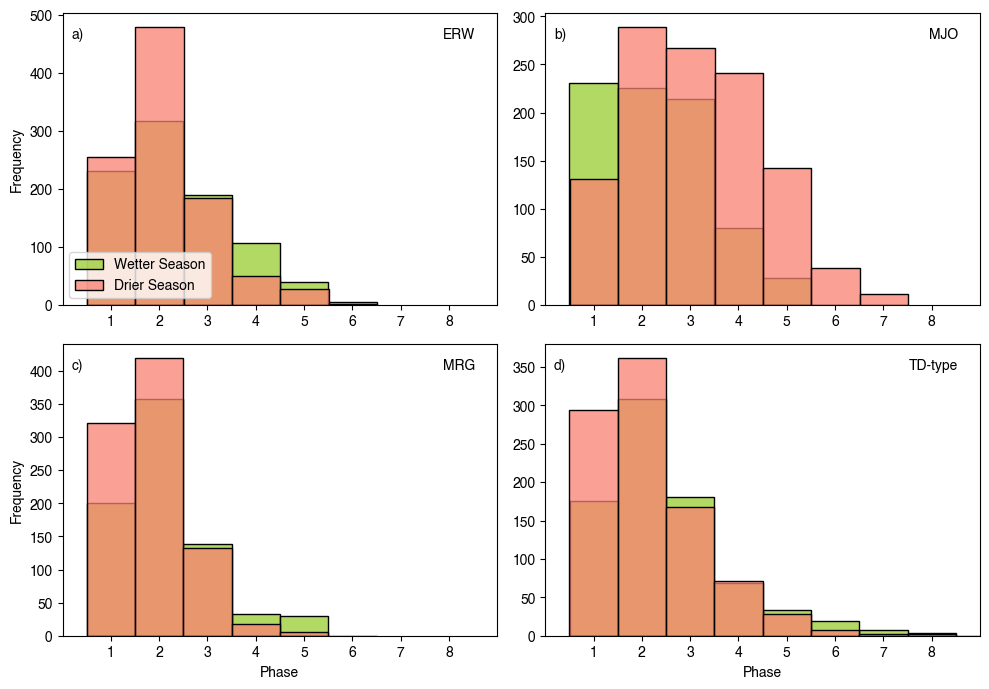

In [45]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=False)

waves=['ERW', 'MJO', 'MRG', 'TD-type']
alphabet = ['a)' , 'b)', 'c)', 'd)']

fig, axs = plt.subplots(2,2,figsize=(10, 7))
axs = axs.flatten()

sns.histplot(plot_wet_erw['amp'], discrete=True, bins=range(int(plot_wet_erw['amp'].min()), int(plot_wet_erw['amp'].max()) + 2), kde=False, ax=axs[0], 
             color='yellowgreen',element='bars')
sns.histplot(plot_dry_erw['amp'], discrete=True, bins=range(int(plot_dry_erw['amp'].min()), int(plot_dry_erw['amp'].max()) + 2), kde=False, ax=axs[0], 
             color='salmon',element='bars')

sns.histplot(plot_wet_mjo['amp'], discrete=True, bins=range(int(plot_wet_mjo['amp'].min()), int(plot_wet_mjo['amp'].max()) + 2), kde=False, ax=axs[1], color='yellowgreen')
sns.histplot(plot_dry_mjo['amp'], discrete=True, bins=range(int(plot_dry_mjo['amp'].min()), int(plot_dry_mjo['amp'].max()) + 2), kde=False, ax=axs[1], color='salmon')

sns.histplot(plot_wet_mrg['amp'], discrete=True, bins=range(int(plot_wet_mrg['amp'].min()), int(plot_wet_mrg['amp'].max()) + 2), kde=False, ax=axs[2], color='yellowgreen')
sns.histplot(plot_dry_mrg['amp'], discrete=True, bins=range(int(plot_dry_mrg['amp'].min()), int(plot_dry_mrg['amp'].max()) + 2), kde=False, ax=axs[2], color='salmon')

sns.histplot(plot_wet_tdw['amp'], discrete=True, bins=range(int(plot_wet_tdw['amp'].min()), int(plot_wet_tdw['amp'].max()) + 2), kde=False, ax=axs[3], color='yellowgreen')
sns.histplot(plot_dry_tdw['amp'], discrete=True, bins=range(int(plot_dry_tdw['amp'].min()), int(plot_dry_tdw['amp'].max()) + 2), kde=False, ax=axs[3], color='salmon')


for i,wave in enumerate(waves):
    # axs[i].set_title(wave)
    
    axs[0].legend(['Wetter Season', 'Drier Season'], loc='lower left', bbox_to_anchor=(0, 0))  # Manually add legend entry
    # axs[i].set_ylim(0,250)
    # axs[i].set_yscale('log')
    axs[i].set_xlim(0, 9)  # Set x-axis limits
    axs[i].set_xticks(range(1, 9))  # Set x-axis ticks from 1 to 8
    axs[i].annotate(wave, xy=(0.95, 0.95), xycoords='axes fraction',
                    ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', alpha=0.8))
    axs[i].annotate(alphabet[i], xy=(0.02, 0.95), xycoords='axes fraction',
                    ha='left', va='top', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', alpha=0.8))

axs[0].set_xlabel('')
axs[1].set_xlabel('')
axs[2].set_xlabel('Phase')
axs[3].set_xlabel('Phase')

axs[3].set_ylabel('')
axs[1].set_ylabel('')
axs[2].set_ylabel('Frequency')
axs[0].set_ylabel('Frequency')
# # Plot histogram for plot_dry_erw
# axs[1].set_title('Dry ERW')
# axs[1].set_xlabel('Value')
# axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.savefig(folderout+'histogram_'+seas+'.pdf', bbox_inches='tight', dpi=300)

# sns.histplot(df_dry_erw['phase'])

# sns.displot(x=df_dry_erw['phase'], y=df_dry_erw['precip'])

In [46]:
df_wet = plot_wet_erw[['amp','phase']]
average_wet_amp_per_phase = df_wet.groupby('phase')['amp'].mean()
average_wet_amp_per_phase

phase
1.0    2.451198
2.0    2.413405
3.0    2.260606
4.0    2.308574
5.0    2.511085
6.0    2.425751
7.0    2.381713
8.0    2.335690
Name: amp, dtype: float32

In [47]:
df_dry = plot_dry_erw[['amp','phase']]
average_dry_amp_per_phase = df_dry.groupby('phase')['amp'].mean()
average_dry_amp_per_phase

phase
1.0    2.073291
2.0    2.131013
3.0    2.133879
4.0    2.188873
5.0    2.171251
6.0    2.104391
7.0    2.211427
8.0    2.133847
Name: amp, dtype: float32

In [48]:
oni = pd.read_csv('ONI.csv', sep=',')

oni_use = oni[(oni['YR']>=1980) & (oni['YR']<=2020)]

# seasons_to_filter = ['NDJ', 'DJF', 'FMA', 'MAM','AMJ']

if seas=='DJF':
    seasons_to_filter = ['NDJ', 'DJF','JFM']
elif seas=='MAM':
    seasons_to_filter = ['FMA', 'MAM', 'AMJ',]
oni_use = oni_use[oni_use['SEAS'].isin(seasons_to_filter)]


In [49]:
# Define the mapping dictionary
season_mapping = {
    'NDJ': 12,
    'DJF': 1,
    'JFM': 2
}

In [50]:

# Apply the mapping to create a new column 'MONTH'
oni_use['MONTH'] = oni_use['SEAS'].map(season_mapping)
oni_use

,SEAS,YR,TOTAL,ANOM,EVENT,MONTH
360,DJF,1980,27.06,0.59,1,1
361,JFM,1980,27.13,0.46,0,2
371,NDJ,1980,26.48,-0.01,0,12
372,DJF,1981,26.32,-0.26,0,1
373,JFM,1981,26.32,-0.50,0,2
...,...,...,...,...,...,...
829,JFM,2019,27.59,0.72,1,2
839,NDJ,2019,27.17,0.55,1,12
840,DJF,2020,27.14,0.50,0,1
841,JFM,2020,27.35,0.48,0,2


In [51]:
def enso_select(idf, oni):
    df = pd.DataFrame(idf.copy()) 
    df['time'] = df.index
    df.index = df['time']
    df['year'] = df['time'].dt.year
    df['month'] = df['time'].dt.month 

    df = pd.merge(df,oni[['YR','MONTH','EVENT']], left_on=['year','month'], right_on=['YR','MONTH'], how='inner')
    df_nino = df[df['EVENT'] == 1]
    df_nina = df[df['EVENT'] == -1]
    df_ntrl = df[df['EVENT'] == 0]
    dict = {'nino': df_nino,
            'nina': df_nina,
            'ntrl': df_ntrl,
           } 
    
    return(dict)


In [52]:
df_wet_mjo_enso = enso_select(df_wet_mjo, oni_use)
df_dry_mjo_enso = enso_select(df_dry_mjo, oni_use)

df_wet_erw_enso = enso_select(df_wet_erw, oni_use)
df_dry_erw_enso = enso_select(df_dry_erw, oni_use)

df_wet_mrg_enso = enso_select(df_wet_mrg, oni_use)
df_dry_mrg_enso = enso_select(df_dry_mrg, oni_use)

df_wet_tdw_enso = enso_select(df_wet_tdw, oni_use)
df_dry_tdw_enso = enso_select(df_dry_tdw, oni_use)

In [53]:
df_wet_mjo_enso['nino']

,x,y,amp,phase,yyyy-mm-dd,years,precip,wetdays_intensity,heavyrain_intensity,time,year,month,YR,MONTH,EVENT
632,2.106519,0.595464,2.189064,1.0,2009-12-01,2009,False,2.124418,NaN,2009-12-01,2009,12,2009,12,1
633,2.189832,0.298187,2.210040,1.0,2009-12-02,2009,False,NaN,NaN,2009-12-02,2009,12,2009,12,1
634,2.214453,-0.044976,2.214910,1.0,2009-12-03,2009,False,NaN,NaN,2009-12-03,2009,12,2009,12,1
635,2.173552,-0.415670,2.212941,1.0,2009-12-04,2009,False,NaN,NaN,2009-12-04,2009,12,2009,12,1
636,2.063994,-0.792171,2.210793,1.0,2009-12-05,2009,False,NaN,NaN,2009-12-05,2009,12,2009,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,-2.934367,0.365865,2.957087,5.0,2010-02-24,2010,True,16.053719,16.053719,2010-02-24,2010,2,2010,2,1
718,-2.800621,1.084195,3.003158,5.0,2010-02-25,2010,True,45.070057,45.070057,2010-02-25,2010,2,2010,2,1
719,-2.541924,1.728702,3.074051,6.0,2010-02-26,2010,True,37.195839,37.195839,2010-02-26,2010,2,2010,2,1
720,-2.174888,2.266296,3.141057,6.0,2010-02-27,2010,True,20.328066,20.328066,2010-02-27,2010,2,2010,2,1


In [54]:
df_wet_mjo_enso = pd.DataFrame(df_wet_mjo.copy())

# plot_wet_erw_enso.reset_index(inplace=True)
df_wet_mjo_enso['time'] = df_wet_mjo_enso.index
df_wet_mjo_enso.index = df_wet_mjo_enso['time']
df_wet_mjo_enso['year'] = df_wet_mjo_enso['time'].dt.year
df_wet_mjo_enso['month'] = df_wet_mjo_enso['time'].dt.month

df_wet_mjo_enso = pd.merge(df_wet_mjo_enso, oni_use[['YR','MONTH','EVENT']], left_on=['year','month'], right_on=['YR','MONTH'], how='inner')

In [55]:
df_wet_mjo_enso

,x,y,amp,phase,yyyy-mm-dd,years,precip,wetdays_intensity,heavyrain_intensity,time,year,month,YR,MONTH,EVENT
0,0.949463,0.220124,0.974646,0.0,1980-12-01,1980,False,2.104115,NaN,1980-12-01,1980,12,1980,12,0
1,0.976486,0.065454,0.978677,0.0,1980-12-02,1980,False,3.154141,NaN,1980-12-02,1980,12,1980,12,0
2,0.973155,-0.110174,0.979372,0.0,1980-12-03,1980,False,9.470791,NaN,1980-12-03,1980,12,1980,12,0
3,0.936606,-0.295380,0.982080,0.0,1980-12-04,1980,False,1.963988,NaN,1980-12-04,1980,12,1980,12,0
4,0.866237,-0.477013,0.988892,0.0,1980-12-05,1980,False,1.978002,NaN,1980-12-05,1980,12,1980,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,2.027686,-0.847624,2.197721,2.0,2017-02-24,2017,False,5.801336,NaN,2017-02-24,2017,2,2017,2,0
988,1.869125,-0.860294,2.057604,2.0,2017-02-25,2017,False,5.182067,NaN,2017-02-25,2017,2,2017,2,0
989,1.716288,-0.793767,1.890955,2.0,2017-02-26,2017,False,4.273822,NaN,2017-02-26,2017,2,2017,2,0
990,1.581807,-0.669500,1.717657,2.0,2017-02-27,2017,False,2.748302,NaN,2017-02-27,2017,2,2017,2,0


In [56]:
df_wet_mjo_elnino = df_wet_mjo_enso[df_wet_mjo_enso['EVENT'] == 1]
df_wet_mjo_lanina = df_wet_mjo_enso[df_wet_mjo_enso['EVENT'] == -1]
df_wet_mjo_netral = df_wet_mjo_enso[df_wet_mjo_enso['EVENT'] == 0]

In [57]:
count_erw_dry = pd.DataFrame(df_dry_erw['phase'].value_counts()).sort_index()
count_erw_wet = pd.DataFrame(df_wet_erw['phase'].value_counts()).sort_index()
count_erw_mid = pd.DataFrame(df_mid_erw['phase'].value_counts()).sort_index()

count_mjo_dry = pd.DataFrame(df_dry_mjo['phase'].value_counts()).sort_index()
count_mjo_wet = pd.DataFrame(df_wet_mjo['phase'].value_counts(dropna=False)).sort_index()
count_mjo_mid = pd.DataFrame(df_mid_mjo['phase'].value_counts(dropna=False)).sort_index()

count_mrg_dry = pd.DataFrame(df_dry_mrg['phase'].value_counts()).sort_index()
count_mrg_wet = pd.DataFrame(df_wet_mrg['phase'].value_counts()).sort_index()
count_mrg_mid = pd.DataFrame(df_mid_mrg['phase'].value_counts()).sort_index()

count_tdw_dry = pd.DataFrame(df_dry_tdw['phase'].value_counts()).sort_index()
count_tdw_wet = pd.DataFrame(df_wet_tdw['phase'].value_counts()).sort_index()
count_tdw_mid = pd.DataFrame(df_mid_tdw['phase'].value_counts()).sort_index()



In [58]:
df_wet_erw

,x,y,amp,phase,yyyy-mm-dd,years,precip,wetdays_intensity,heavyrain_intensity
yyyy-mm-dd,,,,,,,,,
1980-12-01,-0.357871,-0.100855,0.371811,0.0,1980-12-01,1980,False,2.104115,NaN
1980-12-02,-0.409944,-0.269307,0.490490,0.0,1980-12-02,1980,False,3.154141,NaN
1980-12-03,-0.544429,-0.515005,0.749421,0.0,1980-12-03,1980,False,9.470791,NaN
1980-12-04,-0.766704,-0.703790,1.040747,4.0,1980-12-04,1980,False,1.963988,NaN
1980-12-05,-1.031966,-0.707791,1.251369,4.0,1980-12-05,1980,False,1.978002,NaN
...,...,...,...,...,...,...,...,...,...
2017-02-24,0.145572,3.142366,3.145736,7.0,2017-02-24,2017,False,5.801336,NaN
2017-02-25,1.290927,3.136911,3.392153,7.0,2017-02-25,2017,False,5.182067,NaN
2017-02-26,2.318610,2.454345,3.376354,8.0,2017-02-26,2017,False,4.273822,NaN


In [59]:
df = df_wet_erw.copy()

df.index = pd.to_datetime(df.index)
print(df)
# Extract year and month from the index
df['year'] = df.index.year
df['month'] = df.index.month

# Group by year, month, and phase, and count occurrences
phase_counts = df.groupby(['year', 'month', 'phase']).size().reset_index(name='count')
print(phase_counts[phase_counts['year']==1980])

                   x         y       amp  phase  yyyy-mm-dd  years  precip  \
yyyy-mm-dd                                                                   
1980-12-01 -0.357871 -0.100855  0.371811    0.0  1980-12-01   1980   False   
1980-12-02 -0.409944 -0.269307  0.490490    0.0  1980-12-02   1980   False   
1980-12-03 -0.544429 -0.515005  0.749421    0.0  1980-12-03   1980   False   
1980-12-04 -0.766704 -0.703790  1.040747    4.0  1980-12-04   1980   False   
1980-12-05 -1.031966 -0.707791  1.251369    4.0  1980-12-05   1980   False   
...              ...       ...       ...    ...         ...    ...     ...   
2017-02-24  0.145572  3.142366  3.145736    7.0  2017-02-24   2017   False   
2017-02-25  1.290927  3.136911  3.392153    7.0  2017-02-25   2017   False   
2017-02-26  2.318610  2.454345  3.376354    8.0  2017-02-26   2017   False   
2017-02-27  2.991130  1.172371  3.212680    1.0  2017-02-27   2017   False   
2017-02-28  3.130749 -0.459787  3.164332    1.0  2017-02-28   20

In [60]:
dict_df = {
    'mjo_wet':df_wet_mjo,
    'mjo_dry':df_dry_mjo,
    'mjo_mid':df_mid_mjo,
    'erw_wet':df_wet_erw,
    'erw_dry':df_dry_erw,
    'erw_mid':df_mid_erw,
    'mrg_wet':df_wet_mrg,
    'mrg_dry':df_dry_mrg,
    'mrg_mid':df_mid_mrg,
    'tdw_wet':df_wet_tdw,
    'tdw_dry':df_dry_tdw,
    'tdw_mid':df_mid_tdw,
}

In [61]:
for i in dict_df.keys():
    dict_df[i]['yyyymmdd'] = pd.to_datetime(dict_df[i]['yyyy-mm-dd']).dt.strftime('%Y%m%d')
    dict_df[i][['yyyymmdd','phase']].astype('int64').to_csv(folder_index+'index_'+i+'.csv', index= False, header=None)

In [62]:
df_wet_tdw['yyyymmdd']

yyyy-mm-dd
1980-12-01    19801201
1980-12-02    19801202
1980-12-03    19801203
1980-12-04    19801204
1980-12-05    19801205
                ...   
2017-02-24    20170224
2017-02-25    20170225
2017-02-26    20170226
2017-02-27    20170227
2017-02-28    20170228
Name: yyyymmdd, Length: 992, dtype: object

In [63]:
df_wet_mjo

,x,y,amp,phase,yyyy-mm-dd,years,precip,wetdays_intensity,heavyrain_intensity,yyyymmdd
yyyy-mm-dd,,,,,,,,,,
1980-12-01,0.949463,0.220124,0.974646,0.0,1980-12-01,1980,False,2.104115,NaN,19801201
1980-12-02,0.976486,0.065454,0.978677,0.0,1980-12-02,1980,False,3.154141,NaN,19801202
1980-12-03,0.973155,-0.110174,0.979372,0.0,1980-12-03,1980,False,9.470791,NaN,19801203
1980-12-04,0.936606,-0.295380,0.982080,0.0,1980-12-04,1980,False,1.963988,NaN,19801204
1980-12-05,0.866237,-0.477013,0.988892,0.0,1980-12-05,1980,False,1.978002,NaN,19801205
...,...,...,...,...,...,...,...,...,...,...
2017-02-24,2.027686,-0.847624,2.197721,2.0,2017-02-24,2017,False,5.801336,NaN,20170224
2017-02-25,1.869125,-0.860294,2.057604,2.0,2017-02-25,2017,False,5.182067,NaN,20170225
2017-02-26,1.716288,-0.793767,1.890955,2.0,2017-02-26,2017,False,4.273822,NaN,20170226


In [64]:
dict_phase = {}

for n,items in zip(dict_df.keys(),dict_df.items()):
    df = dict_df[n]
    df.index = pd.to_datetime(df.index)
    # Extract year and month from the index
    df['year'] = df.index.year
    df['month'] = df.index.month
    
    # Group by year, month, and phase, and count occurrences
    phase_counts = df.groupby(['year', 'month', 'phase']).size().reset_index(name='count')
    dict_phase[n] = phase_counts.groupby('phase')['count'].sum().reset_index(name='sum_count')

In [65]:
df_wet_mjo_enso = enso_select(df_wet_mjo, oni_use)
df_dry_mjo_enso = enso_select(df_dry_mjo, oni_use)

df_wet_erw_enso = enso_select(df_wet_erw, oni_use)
df_dry_erw_enso = enso_select(df_dry_erw, oni_use)

df_wet_mrg_enso = enso_select(df_wet_mrg, oni_use)
df_dry_mrg_enso = enso_select(df_dry_mrg, oni_use)

df_wet_tdw_enso = enso_select(df_wet_tdw, oni_use)
df_dry_tdw_enso = enso_select(df_dry_tdw, oni_use)

In [66]:
(dict_phase['mjo_wet'] - dict_phase['mjo_dry'])

,phase,sum_count
0,0.0,67
1,0.0,-64
2,0.0,-29
3,0.0,-47
4,0.0,-41
5,0.0,-43
6,0.0,-22
7,0.0,-44
8,0.0,-51


In [67]:
for i in df_wet_mjo_enso.keys():
    df_wet_mjo_enso[i][['yyyymmdd','phase']].astype('int64').to_csv(folder_index+i+'_mjo_wet.csv', index= False, header=None)
for i in df_dry_mjo_enso.keys():
    df_dry_mjo_enso[i][['yyyymmdd','phase']].astype('int64').to_csv(folder_index+i+'_mjo_dry.csv', index= False, header=None)

for i in df_wet_erw_enso.keys():
    df_wet_erw_enso[i][['yyyymmdd','phase']].astype('int64').to_csv(folder_index+i+'_erw_wet.csv', index= False, header=None)
for i in df_dry_erw_enso.keys():
    df_dry_erw_enso[i][['yyyymmdd','phase']].astype('int64').to_csv(folder_index+i+'_erw_dry.csv', index= False, header=None)

for i in df_wet_mrg_enso.keys():
    df_wet_mrg_enso[i][['yyyymmdd','phase']].astype('int64').to_csv(folder_index+i+'_mrg_wet.csv', index= False, header=None)
for i in df_dry_mrg_enso.keys():
    df_dry_mrg_enso[i][['yyyymmdd','phase']].astype('int64').to_csv(folder_index+i+'_mrg_dry.csv', index= False, header=None)

for i in df_wet_tdw_enso.keys():
    df_wet_tdw_enso[i][['yyyymmdd','phase']].astype('int64').to_csv(folder_index+i+'_tdw_wet.csv', index= False, header=None)
for i in df_dry_tdw_enso.keys():
    df_dry_tdw_enso[i][['yyyymmdd','phase']].astype('int64').to_csv(folder_index+i+'_tdw_dry.csv', index= False, header=None)

In [68]:
# diff_erw = dict_phase['erw_wet']['count'] - dict_phase['erw_dry']['count']
# diff_mjo = dict_phase['mjo_wet'] - dict_phase['mjo_dry']

In [69]:
print(count_mjo_wet.loc[0:8]/(count_mjo_dry.loc[0:8].sum()+count_mjo_wet.loc[0:8].sum())*100., "wet")
print(count_mjo_dry.loc[0:8]/(count_mjo_dry.loc[0:8].sum()+count_mjo_wet.loc[0:8].sum())*100., "dry")



        phase
0.0  9.433127
1.0  3.985828
2.0  4.384411
3.0  3.897254
4.0  5.270151
5.0  5.358725
6.0  4.207263
7.0  3.277236
8.0  4.118689 wet
        phase
0.0  6.465899
1.0  6.820195
2.0  5.668733
3.0  5.978742
4.0  7.085917
5.0  7.263065
6.0  5.181577
7.0  5.225864
8.0  6.377325 dry


In [70]:
# diff_erw = ((count_erw_wet.loc[1:8]/count_erw_wet.loc[1:8].sum() - count_erw_dry.loc[1:8]/count_erw_dry.loc[1:8].sum())*100).squeeze()
# diff_mjo = ((count_mjo_wet.loc[1:8]/count_mjo_wet.loc[1:8].sum() - count_mjo_dry.loc[1:8]/count_mjo_dry.loc[1:8].sum())*100).squeeze()
# diff_mrg = ((count_mrg_wet.loc[1:8]/count_mrg_wet.loc[1:8].sum() - count_mrg_dry.loc[1:8]/count_mrg_dry.loc[1:8].sum())*100).squeeze()
# diff_tdw = ((count_tdw_wet.loc[1:8]/count_tdw_wet.loc[1:8].sum() - count_tdw_dry.loc[1:8]/count_tdw_dry.loc[1:8].sum())*100).squeeze()


# diff_mjo = ((count_mjo_wet - count_mjo_dry)*100./count_mjo_dry).squeeze()
# diff_mrg = ((count_mrg_wet - count_mrg_dry)*100./count_mrg_dry).squeeze()
# diff_tdw = ((count_tdw_wet - count_tdw_dry)*100./count_tdw_dry).squeeze()

total_wet = count_erw_wet.sum()
total_dry = count_erw_dry.sum()

print(total_wet)
print(total_dry)

diff_erw = (count_erw_wet/len(df_wet) - count_erw_dry/len(df_dry)).squeeze()
diff_mjo = (count_mjo_wet/len(df_wet) - count_mjo_dry/len(df_dry)).squeeze()
diff_mrg = (count_mrg_wet/len(df_wet) - count_mrg_dry/len(df_dry)).squeeze()
diff_tdw = (count_tdw_wet/len(df_wet) - count_tdw_dry/len(df_dry)).squeeze()



phase    992
dtype: int64
phase    1266
dtype: int64


In [71]:
plot_percent = pd.DataFrame([diff_mjo.values,diff_erw.values, diff_mrg.values, diff_tdw.values], 
                         index=['MJO','ER', 'MRG', 'TDW'], columns=diff_erw.index).transpose()

In [72]:
plot_percent_active = plot_percent.loc[1:8]
plot_percent_active.index = plot_percent_active.index.astype(int)

In [73]:
plot_percent_active

,MJO,ER,MRG,TDW
1,-0.052957,-0.017027,-0.005739,0.002383
2,-0.016770,-0.009260,-0.010368,-0.018508
3,-0.036171,-0.005509,0.010647,0.000264
4,-0.026312,0.017519,-0.022392,-0.019643
5,-0.028067,0.004006,0.017289,0.015533
6,-0.010252,0.004511,-0.029282,-0.009260
7,-0.034903,0.007766,0.011162,-0.012753
8,-0.039559,-0.002006,-0.014261,0.002383


In [74]:
iarr = np.arange(0,9)
# print(x)
for i in iarr:
    df_wet_mjo['values_'+str(i)] = df_wet_mjo['phase'].apply(lambda x: 1 if x == i else 0)
    df_dry_mjo['values_'+str(i)] = df_dry_mjo['phase'].apply(lambda x: 1 if x == i else 0)
    df_mjo['values_'+str(i)] = df_mjo['phase'].apply(lambda x: 1 if x == i else 0)
    df_mid_mjo['values_'+str(i)] = df_mid_mjo['phase'].apply(lambda x: 1 if x == i else 0)
    
    df_wet_erw['values_'+str(i)] = df_wet_erw['phase'].apply(lambda x: 1 if x == i else 0)
    df_erw['values_'+str(i)] = df_erw['phase'].apply(lambda x: 1 if x == i else 0)
    df_dry_erw['values_'+str(i)] = df_dry_erw['phase'].apply(lambda x: 1 if x == i else 0)
    df_mid_erw['values_'+str(i)] = df_mid_erw['phase'].apply(lambda x: 1 if x == i else 0)
    
    df_wet_mrg['values_'+str(i)] = df_wet_mrg['phase'].apply(lambda x: 1 if x == i else 0)
    df_dry_mrg['values_'+str(i)] = df_dry_mrg['phase'].apply(lambda x: 1 if x == i else 0)
    df_mrg['values_'+str(i)] = df_mrg['phase'].apply(lambda x: 1 if x == i else 0)
    df_mid_mrg['values_'+str(i)] = df_mid_mrg['phase'].apply(lambda x: 1 if x == i else 0)
    
    df_wet_tdw['values_'+str(i)] = df_wet_tdw['phase'].apply(lambda x: 1 if x == i else 0)
    df_dry_tdw['values_'+str(i)] = df_dry_tdw['phase'].apply(lambda x: 1 if x == i else 0)
    df_tdw['values_'+str(i)] = df_tdw['phase'].apply(lambda x: 1 if x == i else 0)
    df_mid_tdw['values_'+str(i)] = df_mid_tdw['phase'].apply(lambda x: 1 if x == i else 0)

In [75]:
groupwet = {
    'MJO':df_wet_mjo,
    'ERW':df_wet_erw,
    'MRG':df_wet_mrg,
    'TDW':df_wet_tdw,
}

groupdry = {
    'MJO':df_dry_mjo,
    'ERW':df_dry_erw,
    'MRG':df_dry_mrg,
    'TDW':df_dry_tdw,
}


groupall = {
    'MJO':df_mjo,
    'ERW':df_erw,
    'MRG':df_mrg,
    'TDW':df_tdw,
}

groupmid = {
    'MJO':df_mid_mjo,
    'ERW':df_mid_erw,
    'MRG':df_mid_mrg,
    'TDW':df_mid_tdw,
}

In [76]:
print(df_wet_mjo)
print(df_dry_mjo['values_4'])

                   x         y       amp  phase  yyyy-mm-dd  years  precip  \
yyyy-mm-dd                                                                   
1980-12-01  0.949463  0.220124  0.974646    0.0  1980-12-01   1980   False   
1980-12-02  0.976486  0.065454  0.978677    0.0  1980-12-02   1980   False   
1980-12-03  0.973155 -0.110174  0.979372    0.0  1980-12-03   1980   False   
1980-12-04  0.936606 -0.295380  0.982080    0.0  1980-12-04   1980   False   
1980-12-05  0.866237 -0.477013  0.988892    0.0  1980-12-05   1980   False   
...              ...       ...       ...    ...         ...    ...     ...   
2017-02-24  2.027686 -0.847624  2.197721    2.0  2017-02-24   2017   False   
2017-02-25  1.869125 -0.860294  2.057604    2.0  2017-02-25   2017   False   
2017-02-26  1.716288 -0.793767  1.890955    2.0  2017-02-26   2017   False   
2017-02-27  1.581807 -0.669500  1.717657    2.0  2017-02-27   2017   False   
2017-02-28  1.473951 -0.512999  1.560673    1.0  2017-02-28   20

In [77]:
df_dry_mjo

,x,y,amp,phase,yyyy-mm-dd,years,precip,wetdays_intensity,heavyrain_intensity,yyyymmdd,...,month,values_0,values_1,values_2,values_3,values_4,values_5,values_6,values_7,values_8
yyyy-mm-dd,,,,,,,,,,,,,,,,,,,,,
1982-12-01,0.211564,-0.270416,0.343343,0.0,1982-12-01,1982,False,1.134954,NaN,19821201,...,12,1,0,0,0,0,0,0,0,0
1982-12-02,0.163581,-0.269345,0.315128,0.0,1982-12-02,1982,False,2.515175,NaN,19821202,...,12,1,0,0,0,0,0,0,0,0
1982-12-03,0.114070,-0.286021,0.307929,0.0,1982-12-03,1982,False,3.141252,NaN,19821203,...,12,1,0,0,0,0,0,0,0,0
1982-12-04,0.060051,-0.316203,0.321854,0.0,1982-12-04,1982,False,4.508979,NaN,19821204,...,12,1,0,0,0,0,0,0,0,0
1982-12-05,-0.000385,-0.352611,0.352612,0.0,1982-12-05,1982,False,1.766465,NaN,19821205,...,12,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-25,-1.677793,-1.941715,2.566174,4.0,2020-02-25,2020,True,26.598692,26.598692,20200225,...,2,0,0,0,0,1,0,0,0,0
2020-02-26,-2.003554,-1.645527,2.592680,4.0,2020-02-26,2020,True,45.950909,45.950909,20200226,...,2,0,0,0,0,1,0,0,0,0
2020-02-27,-2.273419,-1.327851,2.632798,4.0,2020-02-27,2020,True,26.615988,26.615988,20200227,...,2,0,0,0,0,1,0,0,0,0


In [78]:
print(df_mid_mjo[df_mid_mjo['phase'] ==4]['phase'])
print(df_wet_mjo[df_wet_mjo['phase'] ==4]['phase'])
print(df_dry_mjo[df_dry_mjo['phase'] ==4]['phase'])

yyyy-mm-dd
1981-12-01    4.0
1981-12-02    4.0
1981-12-03    4.0
1981-12-04    4.0
1981-12-05    4.0
             ... 
2018-01-16    4.0
2018-01-17    4.0
2018-02-20    4.0
2018-02-21    4.0
2018-02-22    4.0
Name: phase, Length: 162, dtype: float64
yyyy-mm-dd
1981-01-08    4.0
1981-01-09    4.0
1981-01-10    4.0
1981-01-11    4.0
1981-02-11    4.0
             ... 
2017-01-30    4.0
2017-01-31    4.0
2017-02-01    4.0
2017-02-02    4.0
2017-02-03    4.0
Name: phase, Length: 119, dtype: float64
yyyy-mm-dd
1982-12-30    4.0
1982-12-31    4.0
1983-01-01    4.0
1983-01-02    4.0
1983-01-03    4.0
             ... 
2020-01-28    4.0
2020-02-24    4.0
2020-02-25    4.0
2020-02-26    4.0
2020-02-27    4.0
Name: phase, Length: 160, dtype: float64


In [79]:
def add_dense_hatching(ax, bar, hatch_pattern):
    """
    Adds a custom dense hatch pattern to a bar.
    """
    # Create a custom patch with dense hatch
    bbox = bar.get_bbox()
    hatch_pattern = hatch_pattern * 3  # Increase density by repeating the pattern
    patch = patches.Rectangle((bbox.x0, bbox.y0), bbox.width, bbox.height,
                              linewidth=0, edgecolor='None',
                              facecolor='None', hatch=hatch_pattern)
    ax.add_patch(patch)

In [80]:
useplot = plot_percent_active[['MJO', 'ER', 'MRG', 'TDW']]

In [81]:
freq = '2W'

In [82]:
# phases_of_interest1 = [4,5,6]
phases_of_interest1 = [4,5,6]
phases_of_interest2 = [4,5,6]
phases_of_interest3 = [5,6]


In [83]:
count_mon_wet_erw = df_wet_erw.groupby([pd.Grouper(freq=freq), 'phase']).size().unstack(fill_value=0)
count_mon_dry_erw = df_dry_erw.groupby([pd.Grouper(freq=freq), 'phase']).size().unstack(fill_value=0)
count_mon_mid_erw = df_mid_erw.groupby([pd.Grouper(freq=freq), 'phase']).size().unstack(fill_value=0)
count_mon_erw = df_erw.groupby([pd.Grouper(freq=freq), 'phase']).size().unstack(fill_value=0)

count_mon_wet_mjo = df_wet_mjo.groupby([pd.Grouper(freq=freq), 'phase']).size().unstack(fill_value=0)
count_mon_dry_mjo = df_dry_mjo.groupby([pd.Grouper(freq=freq), 'phase']).size().unstack(fill_value=0)
count_mon_mid_mjo = df_mid_mjo.groupby([pd.Grouper(freq=freq), 'phase']).size().unstack(fill_value=0)
count_mon_mjo = df_mjo.groupby([pd.Grouper(freq=freq), 'phase']).size().unstack(fill_value=0)

count_mon_wet_mrg = df_wet_mrg.groupby([pd.Grouper(freq=freq), 'phase']).size().unstack(fill_value=0)
count_mon_dry_mrg = df_dry_mrg.groupby([pd.Grouper(freq=freq), 'phase']).size().unstack(fill_value=0)
count_mon_mid_mrg = df_mid_mrg.groupby([pd.Grouper(freq=freq), 'phase']).size().unstack(fill_value=0)
count_mon_mrg = df_mrg.groupby([pd.Grouper(freq=freq), 'phase']).size().unstack(fill_value=0)

count_mon_wet_tdw = df_wet_tdw.groupby([pd.Grouper(freq=freq), 'phase']).size().unstack(fill_value=0)
count_mon_dry_tdw = df_dry_tdw.groupby([pd.Grouper(freq=freq), 'phase']).size().unstack(fill_value=0)
count_mon_mid_tdw = df_mid_tdw.groupby([pd.Grouper(freq=freq), 'phase']).size().unstack(fill_value=0)
count_mon_tdw = df_tdw.groupby([pd.Grouper(freq=freq), 'phase']).size().unstack(fill_value=0)

In [84]:
sum_freq_wet_erw = pd.DataFrame(count_mon_wet_erw[phases_of_interest2].sum(axis=1, skipna=True), columns=['freq'])
sum_freq_mid_erw = pd.DataFrame(count_mon_mid_erw[phases_of_interest2].sum(axis=1, skipna=True), columns=['freq'])
sum_freq_dry_erw = pd.DataFrame(count_mon_dry_erw[phases_of_interest2].sum(axis=1, skipna=True), columns=['freq'])
sum_freq_erw = pd.DataFrame(count_mon_erw[phases_of_interest2].sum(axis=1, skipna=True), columns=['freq'])

sum_freq_mid_mjo = pd.DataFrame(count_mon_mid_mjo[phases_of_interest1].sum(axis=1, skipna=True), columns=['freq'])
sum_freq_wet_mjo = pd.DataFrame(count_mon_wet_mjo[phases_of_interest1].sum(axis=1, skipna=True), columns=['freq'])
sum_freq_dry_mjo = pd.DataFrame(count_mon_dry_mjo[phases_of_interest1].sum(axis=1, skipna=True), columns=['freq'])
sum_freq_mjo = pd.DataFrame(count_mon_mjo[phases_of_interest1].sum(axis=1, skipna=True), columns=['freq'])

sum_freq_mid_mrg = pd.DataFrame(count_mon_mid_mrg[phases_of_interest3].sum(axis=1, skipna=True), columns=['freq'])
sum_freq_wet_mrg = pd.DataFrame(count_mon_wet_mrg[phases_of_interest3].sum(axis=1, skipna=True), columns=['freq'])
sum_freq_dry_mrg = pd.DataFrame(count_mon_dry_mrg[phases_of_interest3].sum(axis=1, skipna=True), columns=['freq'])
sum_freq_mrg = pd.DataFrame(count_mon_mrg[phases_of_interest3].sum(axis=1, skipna=True), columns=['freq'])

sum_freq_mid_tdw = pd.DataFrame(count_mon_mid_tdw[phases_of_interest3].sum(axis=1, skipna=True), columns=['freq'])
sum_freq_wet_tdw = pd.DataFrame(count_mon_wet_tdw[phases_of_interest3].sum(axis=1, skipna=True), columns=['freq'])
sum_freq_dry_tdw = pd.DataFrame(count_mon_dry_tdw[phases_of_interest3].sum(axis=1, skipna=True), columns=['freq'])
sum_freq_tdw = pd.DataFrame(count_mon_tdw[phases_of_interest3].sum(axis=1, skipna=True), columns=['freq'])


In [85]:
df_wet_erw

,x,y,amp,phase,yyyy-mm-dd,years,precip,wetdays_intensity,heavyrain_intensity,yyyymmdd,...,month,values_0,values_1,values_2,values_3,values_4,values_5,values_6,values_7,values_8
yyyy-mm-dd,,,,,,,,,,,,,,,,,,,,,
1980-12-01,-0.357871,-0.100855,0.371811,0.0,1980-12-01,1980,False,2.104115,NaN,19801201,...,12,1,0,0,0,0,0,0,0,0
1980-12-02,-0.409944,-0.269307,0.490490,0.0,1980-12-02,1980,False,3.154141,NaN,19801202,...,12,1,0,0,0,0,0,0,0,0
1980-12-03,-0.544429,-0.515005,0.749421,0.0,1980-12-03,1980,False,9.470791,NaN,19801203,...,12,1,0,0,0,0,0,0,0,0
1980-12-04,-0.766704,-0.703790,1.040747,4.0,1980-12-04,1980,False,1.963988,NaN,19801204,...,12,0,0,0,0,1,0,0,0,0
1980-12-05,-1.031966,-0.707791,1.251369,4.0,1980-12-05,1980,False,1.978002,NaN,19801205,...,12,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-24,0.145572,3.142366,3.145736,7.0,2017-02-24,2017,False,5.801336,NaN,20170224,...,2,0,0,0,0,0,0,0,1,0
2017-02-25,1.290927,3.136911,3.392153,7.0,2017-02-25,2017,False,5.182067,NaN,20170225,...,2,0,0,0,0,0,0,0,1,0
2017-02-26,2.318610,2.454345,3.376354,8.0,2017-02-26,2017,False,4.273822,NaN,20170226,...,2,0,0,0,0,0,0,0,0,1


In [86]:
file = df_prc_TE.resample(freq).sum()

mid_erw = sum_freq_mid_erw.join(file['precip'], how='left')
wet_erw = sum_freq_wet_erw.join(file['precip'], how='left')
dry_erw = sum_freq_dry_erw.join(file['precip'], how='left')
erw     = sum_freq_erw.join(file['precip'], how='left')

mid_mjo = sum_freq_mid_mjo.join(file['precip'], how='left')
wet_mjo = sum_freq_wet_mjo.join(file['precip'], how='left')
dry_mjo = sum_freq_dry_mjo.join(file['precip'], how='left')
mjo     = sum_freq_mjo.join(file['precip'], how='left')

mid_mrg = sum_freq_mid_mrg.join(file['precip'], how='left')
wet_mrg = sum_freq_wet_mrg.join(file['precip'], how='left')
dry_mrg = sum_freq_dry_mrg.join(file['precip'], how='left')
mrg     = sum_freq_mrg.join(file['precip'], how='left')

mid_tdw = sum_freq_mid_tdw.join(file['precip'], how='left')
wet_tdw = sum_freq_wet_tdw.join(file['precip'], how='left')
dry_tdw = sum_freq_dry_tdw.join(file['precip'], how='left')
tdw     = sum_freq_tdw.join(file['precip'], how='left')

In [87]:
print(dry_erw.count())
print(wet_erw.count())
print(mid_erw.count())

print(dry_mjo.count())
print(wet_mjo.count())
print(mid_mjo.count())

print(dry_mrg.count())
print(wet_mrg.count())
print(mid_tdw.count())

print(dry_tdw.count())
print(wet_tdw.count())
print(mid_tdw.count())

freq      106
precip    106
dtype: int64
freq      80
precip    80
dtype: int64
freq      111
precip    111
dtype: int64
freq      106
precip    106
dtype: int64
freq      80
precip    80
dtype: int64
freq      111
precip    111
dtype: int64
freq      106
precip    106
dtype: int64
freq      80
precip    80
dtype: int64
freq      111
precip    111
dtype: int64
freq      106
precip    106
dtype: int64
freq      80
precip    80
dtype: int64
freq      111
precip    111
dtype: int64


In [88]:
print(wet_erw)
print(wet_mjo)

            freq  precip
yyyy-mm-dd              
1980-12-07     4       0
1980-12-21     7       3
1981-01-04     1       2
1981-01-18     5       5
1981-02-01     8      10
...          ...     ...
2017-01-15     7       3
2017-01-29     2       8
2017-02-12     3      11
2017-02-26     9       5
2017-03-12     0       0

[80 rows x 2 columns]
            freq  precip
yyyy-mm-dd              
1980-12-07     0       0
1980-12-21     0       3
1981-01-04     0       2
1981-01-18    11       5
1981-02-01     1      10
...          ...     ...
2017-01-15     0       3
2017-01-29     0       8
2017-02-12    12      11
2017-02-26     0       5
2017-03-12     0       0

[80 rows x 2 columns]


In [89]:
ncount_erw_dry = dry_erw.count()
ncount_erw_wet = wet_erw.count()
ncount_erw_mid = mid_erw.count()

ncount_mjo_dry = dry_mjo.count()
ncount_mjo_wet = wet_mjo.count()
ncount_mjo_mid = mid_mjo.count()
# //////
ncount_mrg_dry = dry_mrg.count()
ncount_mrg_wet = wet_mrg.count()
ncount_mrg_mid = mid_mrg.count()

ncount_tdw_dry = dry_tdw.count()
ncount_tdw_wet = wet_tdw.count()
ncount_tdw_mid = mid_tdw.count()

In [90]:
ncount_wet = {
    'mjo':ncount_mjo_wet,
    'erw':ncount_erw_wet ,
    'mrg':ncount_mrg_wet ,
    'tdw':ncount_tdw_wet,
}

ncount_dry = {
    'mjo':ncount_mjo_dry,
    'erw':ncount_erw_dry,
    'mrg':ncount_mrg_dry ,
    'tdw':ncount_tdw_dry,
}

ncount_mid = {
    'mjo':ncount_mjo_mid,
    'erw':ncount_erw_mid ,
    'mrg':ncount_mrg_mid ,
    'tdw':ncount_tdw_mid,
}

ncount_all = {
    'mjo':ncount_mjo_mid+ncount_mjo_dry+ncount_mjo_wet,
    'erw':ncount_erw_mid+ncount_erw_dry+ncount_erw_wet,
    'mrg':ncount_mrg_mid+ncount_mrg_dry+ncount_mrg_wet,
    'tdw':ncount_tdw_mid+ncount_tdw_dry+ncount_tdw_wet,
}

In [91]:
mjo

,freq,precip
yyyy-mm-dd,,
1980-12-07,0,0
1980-12-21,0,3
1981-01-04,0,2
1981-01-18,11,5
1981-02-01,1,10
...,...,...
2020-01-12,11,3
2020-01-26,1,5
2020-02-09,4,3


In [92]:
df_wet_erw['values_4']

yyyy-mm-dd
1980-12-01    0
1980-12-02    0
1980-12-03    0
1980-12-04    1
1980-12-05    1
             ..
2017-02-24    0
2017-02-25    0
2017-02-26    0
2017-02-27    0
2017-02-28    0
Name: values_4, Length: 992, dtype: int64

In [93]:
df_wet_filtered_erw = df_wet_erw[(df_wet_erw[['values_4', 'values_5', 'values_6']] > 0).any(axis=1)]
df_mid_filtered_erw = df_mid_erw[(df_mid_erw[['values_4', 'values_5', 'values_6']] > 0).any(axis=1)]
df_dry_filtered_erw = df_dry_erw[(df_dry_erw[['values_4', 'values_5', 'values_6']] > 0).any(axis=1)]

df_wet_filtered_mjo = df_wet_mjo[(df_wet_mjo[['values_4', 'values_5', 'values_6']] > 0).any(axis=1)]
df_mid_filtered_mjo = df_mid_mjo[(df_mid_mjo[['values_4', 'values_5', 'values_6']] > 0).any(axis=1)]
df_dry_filtered_mjo = df_dry_mjo[(df_dry_mjo[['values_4', 'values_5', 'values_6']] > 0).any(axis=1)]

df_wet_filtered_mrg = df_wet_mrg[(df_wet_mrg[['values_4', 'values_5', 'values_6']] > 0).any(axis=1)]
df_mid_filtered_mrg = df_mid_mrg[(df_mid_mrg[['values_4', 'values_5', 'values_6']] > 0).any(axis=1)]
df_dry_filtered_mrg = df_dry_mrg[(df_dry_mrg[['values_4', 'values_5', 'values_6']] > 0).any(axis=1)]

df_wet_filtered_tdw = df_wet_tdw[(df_wet_tdw[['values_4', 'values_5', 'values_6']] > 0).any(axis=1)]
df_mid_filtered_tdw = df_mid_tdw[(df_mid_tdw[['values_4', 'values_5', 'values_6']] > 0).any(axis=1)]
df_dry_filtered_tdw = df_dry_tdw[(df_dry_tdw[['values_4', 'values_5', 'values_6']] > 0).any(axis=1)]

df_all_filtered_erw = df_erw[(df_erw[['values_4', 'values_5', 'values_6']] > 0).any(axis=1)]
df_all_filtered_mjo = df_mjo[(df_mjo[['values_4', 'values_5', 'values_6']] > 0).any(axis=1)]
df_all_filtered_tdw = df_tdw[(df_tdw[['values_4', 'values_5', 'values_6']] > 0).any(axis=1)]
df_all_filtered_mrg= df_mrg[(df_mrg[['values_4', 'values_5', 'values_6']] > 0).any(axis=1)]


In [94]:
df_mjo

,x,y,amp,phase,yyyy-mm-dd,years,precip,wetdays_intensity,heavyrain_intensity,values_0,values_1,values_2,values_3,values_4,values_5,values_6,values_7,values_8
yyyy-mm-dd,,,,,,,,,,,,,,,,,,
1980-12-01,0.949463,0.220124,0.974646,0.0,1980-12-01,1980,False,2.104115,NaN,1,0,0,0,0,0,0,0,0
1980-12-02,0.976486,0.065454,0.978677,0.0,1980-12-02,1980,False,3.154141,NaN,1,0,0,0,0,0,0,0,0
1980-12-03,0.973155,-0.110174,0.979372,0.0,1980-12-03,1980,False,9.470791,NaN,1,0,0,0,0,0,0,0,0
1980-12-04,0.936606,-0.295380,0.982080,0.0,1980-12-04,1980,False,1.963988,NaN,1,0,0,0,0,0,0,0,0
1980-12-05,0.866237,-0.477013,0.988892,0.0,1980-12-05,1980,False,1.978002,NaN,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-25,-1.677793,-1.941715,2.566174,4.0,2020-02-25,2020,True,26.598692,26.598692,0,0,0,0,1,0,0,0,0
2020-02-26,-2.003554,-1.645527,2.592680,4.0,2020-02-26,2020,True,45.950909,45.950909,0,0,0,0,1,0,0,0,0
2020-02-27,-2.273419,-1.327851,2.632798,4.0,2020-02-27,2020,True,26.615988,26.615988,0,0,0,0,1,0,0,0,0


In [95]:
prec_intensity_wet_erw = df_wet_filtered_erw['heavyrain_intensity'].dropna().mean()
prec_intensity_dry_erw = df_dry_filtered_erw['heavyrain_intensity'].dropna().mean()
prec_intensity_mid_erw = df_mid_filtered_erw['heavyrain_intensity'].dropna().mean()

prec_intensity_wet_mjo = df_wet_filtered_mjo['heavyrain_intensity'].dropna().mean()
prec_intensity_dry_mjo = df_dry_filtered_mjo['heavyrain_intensity'].dropna().mean()
prec_intensity_mid_mjo = df_mid_filtered_mjo['heavyrain_intensity'].dropna().mean()

prec_intensity_wet_mrg = df_wet_filtered_mrg['heavyrain_intensity'].dropna().mean()
prec_intensity_dry_mrg = df_dry_filtered_mrg['heavyrain_intensity'].dropna().mean()
prec_intensity_mid_mrg = df_mid_filtered_mrg['heavyrain_intensity'].dropna().mean()

prec_intensity_wet_tdw = df_wet_filtered_tdw['heavyrain_intensity'].dropna().mean()
prec_intensity_dry_tdw = df_dry_filtered_tdw['heavyrain_intensity'].dropna().mean()
prec_intensity_mid_tdw = df_mid_filtered_tdw['heavyrain_intensity'].dropna().mean()

prec_intensity_all_mjo = df_all_filtered_mjo['heavyrain_intensity'].dropna().mean()
prec_intensity_all_mrg = df_all_filtered_mrg['heavyrain_intensity'].dropna().mean()
prec_intensity_all_erw = df_all_filtered_erw['heavyrain_intensity'].dropna().mean()
prec_intensity_all_tdw = df_all_filtered_tdw['heavyrain_intensity'].dropna().mean()



In [96]:
wetdays_intensity_wet_erw = df_wet_filtered_erw['wetdays_intensity'].dropna().mean()
wetdays_intensity_dry_erw = df_dry_filtered_erw['wetdays_intensity'].dropna().mean()
wetdays_intensity_mid_erw = df_mid_filtered_erw['wetdays_intensity'].dropna().mean()

wetdays_intensity_wet_mjo = df_wet_filtered_mjo['wetdays_intensity'].dropna().mean()
wetdays_intensity_dry_mjo = df_dry_filtered_mjo['wetdays_intensity'].dropna().mean()
wetdays_intensity_mid_mjo = df_mid_filtered_mjo['wetdays_intensity'].dropna().mean()

wetdays_intensity_wet_mrg = df_wet_filtered_mrg['wetdays_intensity'].dropna().mean()
wetdays_intensity_dry_mrg = df_dry_filtered_mrg['wetdays_intensity'].dropna().mean()
wetdays_intensity_mid_mrg = df_mid_filtered_mrg['wetdays_intensity'].dropna().mean()

wetdays_intensity_wet_tdw = df_wet_filtered_tdw['wetdays_intensity'].dropna().mean()
wetdays_intensity_dry_tdw = df_dry_filtered_tdw['wetdays_intensity'].dropna().mean()
wetdays_intensity_mid_tdw = df_mid_filtered_tdw['wetdays_intensity'].dropna().mean()

wetdays_intensity_all_mjo = df_all_filtered_mjo['wetdays_intensity'].dropna().mean()
wetdays_intensity_all_mrg = df_all_filtered_mrg['wetdays_intensity'].dropna().mean()
wetdays_intensity_all_erw = df_all_filtered_erw['wetdays_intensity'].dropna().mean()
wetdays_intensity_all_tdw = df_all_filtered_tdw['wetdays_intensity'].dropna().mean()



In [97]:
wet_dict_intensity = {
    "mjo": prec_intensity_wet_mjo,
    "erw": prec_intensity_wet_erw,
    "mrg": prec_intensity_wet_mrg,
    "tdw": prec_intensity_wet_tdw,
}

wet_dict_wetintensity = {
    "mjo": wetdays_intensity_wet_mjo,
    "erw": wetdays_intensity_wet_erw,
    "mrg": wetdays_intensity_wet_mrg,
    "tdw": wetdays_intensity_wet_tdw,
}

dry_dict_intensity = {
    "mjo": prec_intensity_dry_mjo,
    "erw": prec_intensity_dry_erw,
    "mrg": prec_intensity_dry_mrg,
    "tdw": prec_intensity_dry_tdw,
}


dry_dict_wetintensity = {
    "mjo": wetdays_intensity_dry_mjo,
    "erw": wetdays_intensity_dry_erw,
    "mrg": wetdays_intensity_dry_mrg,
    "tdw": wetdays_intensity_dry_tdw,
}


mid_dict_intensity = {
    "mjo": prec_intensity_mid_mjo,
    "erw": prec_intensity_mid_erw,
    "mrg": prec_intensity_mid_mrg,
    "tdw": prec_intensity_mid_tdw,
}

mid_dict_wetintensity = {
    "mjo": wetdays_intensity_mid_mjo,
    "erw": wetdays_intensity_mid_erw,
    "mrg": wetdays_intensity_mid_mrg,
    "tdw": wetdays_intensity_mid_tdw,
}


all_dict_intensity = {
    "mjo": prec_intensity_all_mjo,
    "erw": prec_intensity_all_erw,
    "mrg": prec_intensity_all_mrg,
    "tdw": prec_intensity_all_tdw,
}

all_dict_wetintensity = {
    "mjo": wetdays_intensity_all_mjo,
    "erw": wetdays_intensity_all_erw,
    "mrg": wetdays_intensity_all_mrg,
    "tdw": wetdays_intensity_all_tdw,
}


wet_dict_plot = {
  "mjo": wet_mjo,
  "erw": wet_erw,
  "mrg": wet_mrg,
  "tdw": wet_tdw,
}

dry_dict_plot = {
  "mjo": dry_mjo,
  "erw": dry_erw,
  "mrg": dry_mrg,
  "tdw": dry_tdw,
}

mid_dict_plot = {
  "mjo": mid_mjo,
  "erw": mid_erw,
  "mrg": mid_mrg,
  "tdw": mid_tdw,
}

all_dict_plot = {
  "mjo": mjo,
  "erw": erw,
  "mrg": mrg,
  "tdw": tdw,
}


In [98]:
all_dict_plot

{'mjo':             freq  precip
 yyyy-mm-dd              
 1980-12-07     0       0
 1980-12-21     0       3
 1981-01-04     0       2
 1981-01-18    11       5
 1981-02-01     1      10
 ...          ...     ...
 2020-01-12    11       3
 2020-01-26     1       5
 2020-02-09     4       3
 2020-02-23     0       3
 2020-03-08     6       4
 
 [297 rows x 2 columns],
 'erw':             freq  precip
 yyyy-mm-dd              
 1980-12-07     4       0
 1980-12-21     7       3
 1981-01-04     1       2
 1981-01-18     5       5
 1981-02-01     8      10
 ...          ...     ...
 2020-01-12     9       3
 2020-01-26     0       5
 2020-02-09     8       3
 2020-02-23     3       3
 2020-03-08     5       4
 
 [297 rows x 2 columns],
 'mrg':             freq  precip
 yyyy-mm-dd              
 1980-12-07     1       0
 1980-12-21     2       3
 1981-01-04     4       2
 1981-01-18     0       5
 1981-02-01     3      10
 ...          ...     ...
 2020-01-12     2       3
 2020-01-26    

In [99]:
wet_mjo

,freq,precip
yyyy-mm-dd,,
1980-12-07,0,0
1980-12-21,0,3
1981-01-04,0,2
1981-01-18,11,5
1981-02-01,1,10
...,...,...
2017-01-15,0,3
2017-01-29,0,8
2017-02-12,12,11


mjowet-h18.243118286132812
mjodry-h16.982563018798828
mjomid-h18.296646118164062
mjoall-h17.954601287841797
mjowet-wd13.414427757263184
mjodry-wd8.613298416137695
mjomid-wd11.21667194366455
mjoall-wd10.921701431274414
[80]
mjo wet  p-value 1.0587609818698178e-07
mjo wet  r- 0.5527504919766351
[80, 111]
mjo mid  p-value 6.12772703533862e-14
mjo mid  r- 0.6363338126488064
[80, 111, 106]
mjo dry  p-value 1.4645291257329662e-12
mjo dry  r- 0.6193814997800219
[80, 111, 106, 297]
mjo all  p-value 1.0245883154226142e-23
mjo all  r- 0.5383327754539934
erwwet-h17.873218536376953
erwdry-h17.304073333740234
erwmid-h17.856351852416992
erwall-h17.741186141967773
erwwet-wd12.748231887817383
erwdry-wd8.732834815979004
erwmid-wd10.332723617553711
erwall-wd10.5873384475708
[80, 111, 106, 297, 80]
erw wet  p-value 2.373456738022646e-05
erw wet  r- 0.45368845377291206
[80, 111, 106, 297, 80, 111]
erw mid  p-value 7.855432998920967e-05
erw mid  r- 0.3658617308379587
[80, 111, 106, 297, 80, 111, 106]
erw d

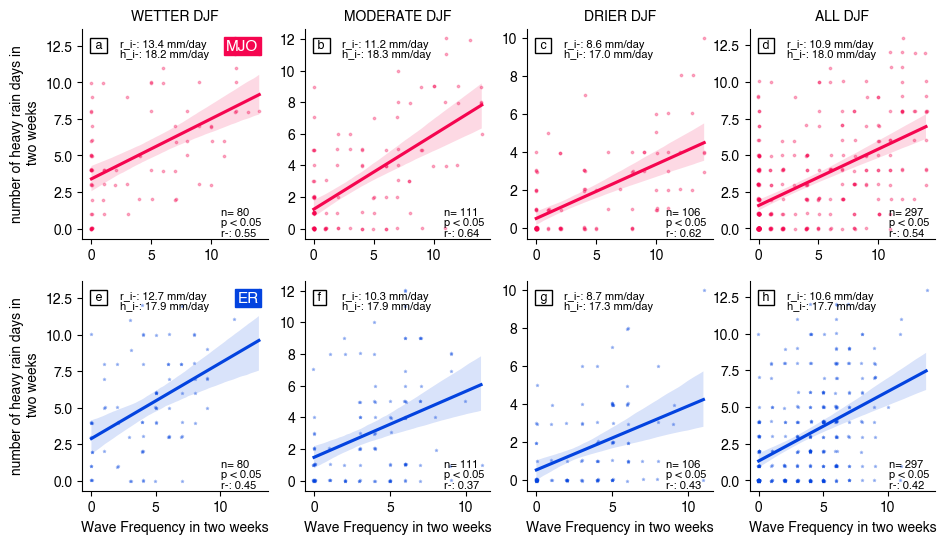

In [100]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# add EL-NINO and La-Nina  years as color code in the dots.
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=False)

# Define marker styles and colors
markers = ['o', '*',]
colors = ['xkcd:pink red', 'xkcd:blue', 'xkcd:pink red', 'xkcd:pea']
# colors = ['xkcd:grey', 'xkcd:grey', 'xkcd:pink red', 'xkcd:pea']

# Create a 4x3 subplot grid
fig, axs = plt.subplots(2, 4, figsize=(11, 6))

# Titles for columns
column_titles = ['WETTER DJF', 'MODERATE DJF', 'DRIER DJF', 'ALL DJF']

# Titles for the top right of each plot in the first column
top_right_titles = ['MJO', 'ER',]
p_value = []
rsquared = []
panel_numbers = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', ]
waves=['mjo','erw']

hi = []
ri = []
nval = []

count=0
for i in range(2):
    w = waves[i]
    # Choose marker style and color based on position
    marker = markers[i]

    print(f"{w}wet-h{wet_dict_intensity[w]}")
    print(f"{w}dry-h{dry_dict_intensity[w]}")
    print(f"{w}mid-h{mid_dict_intensity[w]}")
    print(f"{w}all-h{all_dict_intensity[w]}")

    print(f"{w}wet-wd{wet_dict_wetintensity[w]}")
    print(f"{w}dry-wd{dry_dict_wetintensity[w]}")
    print(f"{w}mid-wd{mid_dict_wetintensity[w]}")
    print(f"{w}all-wd{all_dict_wetintensity[w]}")

    for j in range(4):
        ax = axs[i, j]
        
        # Choose the data based on column
        if j == 0:
            cekseason = "wet"
            data = wet_dict_plot
            ri.append(wet_dict_wetintensity[w])
            hi.append(wet_dict_intensity[w])
            nval.append(ncount_wet[w]['precip'])
        elif j == 1:
            cekseason = "mid"
            data = mid_dict_plot
            ri.append(mid_dict_wetintensity[w])
            hi.append(mid_dict_intensity[w])
            nval.append(ncount_mid[w]['precip'])
        elif j == 2:
            cekseason = "dry"
            data = dry_dict_plot
            ri.append(dry_dict_wetintensity[w])
            hi.append(dry_dict_intensity[w])
            nval.append(ncount_dry[w]['precip'])
        else:

            cekseason = "all"
            data = all_dict_plot
            ri.append(all_dict_wetintensity[w])
            hi.append(all_dict_intensity[w])
            nval.append(ncount_all[w]['precip'])
        
        print(nval)
        color = colors[i]# if j == 2 else 'blue'  # Different color for the third column

        # Plotting
#         print(w)
        sns.regplot(x=data[w]['freq'], y=data[w]['precip'], ax=ax, marker=markers[i], color=color, 
                    ci=95,
                    n_boot=1000,
                    scatter_kws={'s': 3, 'marker':markers[i],'alpha':0.3},
                    x_jitter = 0.05, 
                    y_jitter = 0.05,
                    # line_kws={'color': 'xkcd:medium grey'},  # Change the line color here
                   )
        
        model = ols('freq ~ precip', data=data[w]).fit()
        # print(model)
        
        # Get the p-value for the slope
        p_value.append(model.pvalues['precip'])

        print(w,cekseason," p-value", p_value[count])
        rsquared.append(np.sqrt(model.rsquared))
        print(w,cekseason," r-", rsquared[count])
#         print(p_value[count])
        
        # Set labels
        if j == 0:
#             ax.set_ylabel('wet days ' + freq)
            ax.set_ylabel('number of heavy rain days in\n two weeks')
        else:
            ax.set_ylabel('')
            
        if i == 1:
            ax.set_xlabel('Wave Frequency in two weeks')
        else:
            ax.set_xlabel('')
            

        # Add small titles to the top right of the first column
        if j == 0:
            ax.text(0.95, 0.95, top_right_titles[i], 
                    horizontalalignment='right', verticalalignment='top', 
                    transform=ax.transAxes, fontsize=11, weight='bold',
                    color='white',
                    bbox=dict(facecolor=color, edgecolor=color, pad=1.5))
               # Add panel number
        ax.text(0.05, 0.95, f' {panel_numbers[i * 4 + j]} ', 
                horizontalalignment='left', verticalalignment='top', 
                transform=ax.transAxes, fontsize=9, weight='bold', 
                bbox=dict(facecolor='white', edgecolor='black', pad=1))

        # ax.set_xlim(0, 17)
        # ax.set_ylim(0, 17)
        ax.text(0.75, 0.15, f'n= {nval[count]}',ha='left', va='top', 
         transform=ax.transAxes, fontsize=8, bbox=dict(facecolor='None', alpha=0.5, edgecolor='None'))
        
        ax.text(0.75, 0.1, f'p-: {p_value[count]:.4f}' if p_value[count] > 0.05 else 'p < 0.05', ha='left', va='top', 
         transform=ax.transAxes, fontsize=8, bbox=dict(facecolor='None', alpha=0.5, edgecolor='None'))

        ax.text(0.75, 0.05, f'r-: {rsquared[count]:.2f}', ha='left', va='top', 
         transform=ax.transAxes, fontsize=8, bbox=dict(facecolor='None', alpha=0.5, edgecolor='None'))    
          
        ax.text(0.2, 0.95, f'r_i-: {ri[count]:.1f} mm/day', ha='left', va='top', 
         transform=ax.transAxes, fontsize=8, bbox=dict(facecolor='None', alpha=0.5, edgecolor='None'))
        
        ax.text(0.2, 0.90, f'h_i-: {hi[count]:.1f} mm/day', ha='left', va='top', 
         transform=ax.transAxes, fontsize=8, bbox=dict(facecolor='None', alpha=0.5, edgecolor='None'))
         
        count+=1
        
        
        # for collection in ax.collections:
        #     # if collection.get_edgecolor() == (0.0, 0.0, 0.0, 0.25):  # Default color check
        #     collection.set_facecolor('xkcd:light grey')  # Change to gray
        #     # collection.set_edgecolor('grey')   # Optional: change edge color to gray
        #     collection.set_alpha(0.7)           # Set transparency level

        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)


# Add main title above the first row
# fig.suptitle(seas, fontsize=20)

# Add column titles
for j, title in enumerate(column_titles):
    axs[0, j].set_title(title, fontsize=10)

# Adjust layout
# plt.tight_layout(rect=[0, 0, 0, 0.])  # Adjust to make room for the suptitle
plt.savefig((folderout+'regplot_'+seas+'precip_'+freq+'_wmid.pdf'), bbox_inches='tight')
plt.show()


In [101]:
# COMPARE TRENDS WITH Hinkle Method

In [102]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model_dict_wet = {}
model_dict_dry = {}
model_dict_mid = {}

for w in ['erw','mjo','tdw', 'mrg']:
    model_dict_wet[w] = ols('freq ~ precip', data=wet_dict_plot[w]).fit()
    model_dict_dry[w] = ols('freq ~ precip', data=dry_dict_plot[w]).fit()
    model_dict_mid[w] = ols('freq ~ precip', data=mid_dict_plot[w]).fit()


# Print the summary
# print(model.summary())

In [103]:
def hinkel_test(r1,r2,n1,n2):
    z1 = (1/2)*np.log((1+r1)/(1-r1))
    z2 = (1/2)*np.log((1+r2)/(1-r2))
    dse = np.sqrt(1/(n1-3) + 1/(n2-3))

    z = (z1 - z2)/dse

    # print(z1)
    # print(z2)

    #Calculate P value based on standard normal distribution (two-tailed)
    p = st.norm.sf(abs(z))*2
    return([round(z,3),round(p,3)])

In [104]:
import scipy.stats as st


hinkeltest_wetdry = {}
hinkeltest_wetmid = {}
hinkeltest_middry = {}

for w in ['mjo', 'erw', 'mrg', 'tdw']:

    b_wet = np.sqrt(model_dict_wet[w].rsquared)
    b_dry = np.sqrt(model_dict_dry[w].rsquared)
    b_mid = np.sqrt(model_dict_mid[w].rsquared)

    n_wet = model_dict_wet[w].nobs
    n_dry = model_dict_dry[w].nobs
    n_mid = model_dict_mid[w].nobs

    print(b_wet)
    print(b_dry)
    print(b_mid)

    hinkeltest_wetdry[w] = hinkel_test(b_wet,b_dry,n_wet,n_dry)
    hinkeltest_wetmid[w] = hinkel_test(b_wet,b_mid,n_wet,n_mid)
    hinkeltest_middry[w] = hinkel_test(b_mid,b_dry,n_mid,n_dry)

0.5527504919766351
0.6193814997800219
0.6363338126488064
0.45368845377291206
0.4296455594232395
0.3658617308379587
0.5824802722469927
0.1807019766444928
0.1085274108067735
0.46731269099884637
0.25312246336946254
0.11039955417546769


In [105]:
print("wetdry:", hinkeltest_wetdry)
print("wetmid:", hinkeltest_wetmid)
print("drymid:", hinkeltest_middry)

wetdry: {'mjo': [-0.675, 0.5], 'erw': [0.198, 0.843], 'mrg': [3.209, 0.001], 'tdw': [1.645, 0.1]}
wetmid: {'mjo': [-0.869, 0.385], 'erw': [0.709, 0.479], 'mrg': [3.736, 0.0], 'tdw': [2.654, 0.008]}
drymid: {'mjo': [0.203, 0.839], 'erw': [-0.551, 0.582], 'mrg': [-0.536, 0.592], 'tdw': [-1.074, 0.283]}


In [107]:
model_dict_wet['erw'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   freq   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     20.22
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           2.37e-05
Time:                        22:36:03   Log-Likelihood:                -191.84
No. Observations:                  80   AIC:                             387.7
Df Residuals:                      78   BIC:                             392.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2946      0.545      4.208      0.000       1.209       3.380
precip         0.3986      0.089      4.496      0.000       0.222       0.575
==============================================================================
Omnibus:                        6.151   Durbin-Watson:                   2.529
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                2.624
Skew:                          -0.071   Prob(JB):                        0.269
Kurtosis:                       2.124   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
import scipy.stats as st

def paternoster_test(b1,b2,se1,se2):
    """
    Based on Paternoster et al. (1998) https://doi.org/10.1111/j.1745-9125.1998.tb01268.x
    Perform a statistical test to compare two regression coefficients.

    Parameters:
    - b1: Coefficient 1 (e.g., slope of the first regression line)
    - b2: Coefficient 2 (e.g., slope of the second regression line)
    - se1: Standard error of coefficient 1
    - se2: Standard error of coefficient 2

    Returns:
    - z: Z-score for the difference between the two coefficients
    - p: Two-tailed p-value for the test
    """
    #Calculate Z-score
    z = (b1 - b2)/np.sqrt(se1**2 + se2**2)

    #Calculate P value based on standard normal distribution (two-tailed)
    p = st.norm.sf(abs(z))*2

    return [round(z,3),round(p,3)]

In [109]:
import scipy.stats as st


paternoster_wetdry = {}
paternoster_wetmid = {}
paternoster_middry = {}

for w in ['mjo', 'erw', 'mrg', 'tdw']:

    b_wet = model_dict_wet[w].params['precip']
    b_dry = model_dict_dry[w].params['precip']
    b_mid = model_dict_mid[w].params['precip']

    se_wet = model_dict_wet[w].bse['precip']
    se_dry = model_dict_dry[w].bse['precip']
    se_mid = model_dict_mid[w].bse['precip']

    paternoster_wetdry[w] = paternoster_test(b_wet,b_dry,se_wet,se_dry)
    paternoster_wetmid[w] = paternoster_test(b_wet,b_mid,se_wet,se_mid)
    paternoster_middry[w] = paternoster_test(b_mid,b_dry,se_mid,se_dry)

In [110]:
print("wetdry", paternoster_wetdry)
print("wetmid", paternoster_wetmid)
print("middry", paternoster_middry)


wetdry {'mjo': [-2.899, 0.004], 'erw': [-1.047, 0.295], 'mrg': [1.658, 0.097], 'tdw': [0.371, 0.71]}
wetmid {'mjo': [-0.729, 0.466], 'erw': [0.658, 0.511], 'mrg': [3.319, 0.001], 'tdw': [2.482, 0.013]}
middry {'mjo': [-2.52, 0.012], 'erw': [-1.66, 0.097], 'mrg': [-0.901, 0.368], 'tdw': [-1.577, 0.115]}


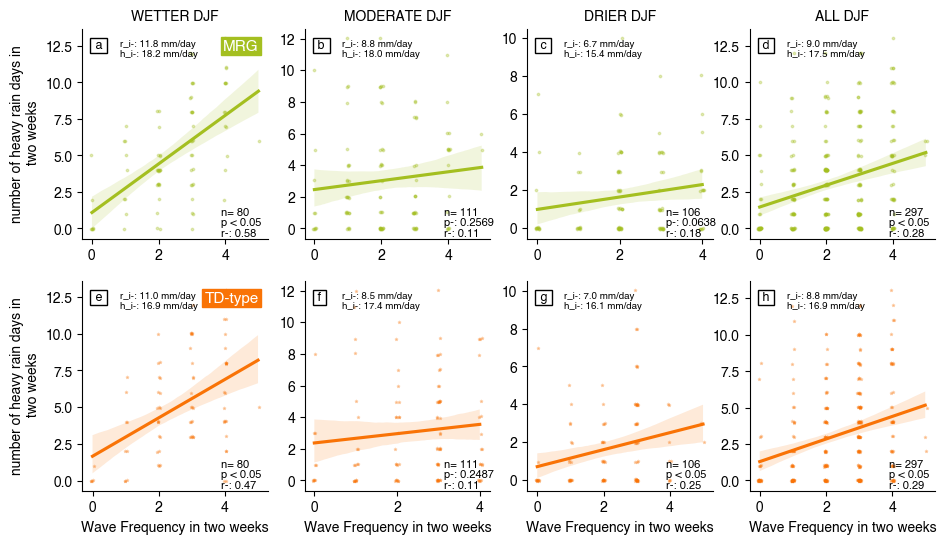

In [111]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# add EL-NINO and La-Nina  years as color code in the dots.
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=False)

# Define marker styles and colors
markers = ['o', '*',]
colors = ['xkcd:pea', 'xkcd:orange', 'xkcd:pink red', 'xkcd:pea']

# Create a 4x3 subplot grid
fig, axs = plt.subplots(2, 4, figsize=(11, 6))

# Titles for columns
column_titles = ['WETTER DJF', 'MODERATE DJF', 'DRIER DJF', 'ALL DJF']

# Titles for the top right of each plot in the first column
top_right_titles = ['MRG', 'TD-type',]
p_value = []
rsquared = []
panel_numbers = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', ]
waves=['mrg','tdw']

count=0
for i in range(2):
    w = waves[i]
    # Choose marker style and color based on position
    marker = markers[i]
    for j in range(4):
        ax = axs[i, j]
        
        # Choose the data based on column
        if j == 0:
            data = wet_dict_plot
            ri = wet_dict_wetintensity[w]
            hi = wet_dict_intensity[w]
            nval = ncount_wet[w]['precip']
        elif j == 2:
            data = dry_dict_plot
            ri = dry_dict_wetintensity[w]
            hi = dry_dict_intensity[w]
            nval = ncount_dry[w]['precip']
        elif j == 1:
            data = mid_dict_plot
            ri = mid_dict_wetintensity[w]
            hi = mid_dict_intensity[w]
            nval = ncount_mid[w]['precip']
        else:
            data = all_dict_plot
            ri = all_dict_wetintensity[w]
            hi = all_dict_intensity[w]
            nval = ncount_all[w]['precip']
        
            
        color = colors[i]# if j == 2 else 'blue'  # Different color for the third column

        # Plotting
#         print(w)
        sns.regplot(x=data[w]['freq'], y=data[w]['precip'], ax=ax, marker=markers[i], color=color, 
                    ci=95,
                    n_boot=1000,
                    scatter_kws={'s': 3, 'marker':markers[i],'alpha':0.3},
                    x_jitter = 0.05, 
                    y_jitter = 0.05,
                    # line_kws={'color': 'xkcd:medium grey'},  # Change the line color here
                   )
        
        model = ols('freq ~ precip', data=data[w]).fit()
        # print(model)
        
        # Get the p-value for the slope
        p_value.append(model.pvalues['precip'])
        rsquared.append(np.sqrt(model.rsquared))
#         print(p_value[count])
        
        # Set labels
        if j == 0:
#             ax.set_ylabel('wet days ' + freq)
            ax.set_ylabel('number of heavy rain days in\n two weeks')
        else:
            ax.set_ylabel('')
            
        if i == 1:
            ax.set_xlabel('Wave Frequency in two weeks')
        else:
            ax.set_xlabel('')
            

        # Add small titles to the top right of the first column
        if j == 0:
            ax.text(0.95, 0.95, top_right_titles[i], 
                    horizontalalignment='right', verticalalignment='top', 
                    transform=ax.transAxes, fontsize=11, weight='bold',
                    color='white',
                    bbox=dict(facecolor=color, edgecolor=color, pad=1.5))
               # Add panel number
        ax.text(0.05, 0.95, f' {panel_numbers[i * 4 + j]} ', 
                horizontalalignment='left', verticalalignment='top', 
                transform=ax.transAxes, fontsize=9, weight='bold', 
                bbox=dict(facecolor='white', edgecolor='black', pad=1))

        # ax.set_xlim(0, 17)
        # ax.set_ylim(0, 17)
        ax.text(0.75, 0.15, f'n= {nval}',ha='left', va='top', 
         transform=ax.transAxes, fontsize=8, bbox=dict(facecolor='None', alpha=0.5, edgecolor='None'))
        
        ax.text(0.75, 0.1, f'p-: {p_value[count]:.4f}' if p_value[count] > 0.05 else 'p < 0.05', ha='left', va='top', 
         transform=ax.transAxes, fontsize=8, bbox=dict(facecolor='None', alpha=0.5, edgecolor='None'))

        ax.text(0.75, 0.05, f'r-: {rsquared[count]:.2f}', ha='left', va='top', 
         transform=ax.transAxes, fontsize=8, bbox=dict(facecolor='None', alpha=0.5, edgecolor='None'))       
        
        ax.text(0.2, 0.95, f'r_i-: {ri:.1f} mm/day', ha='left', va='top', 
         transform=ax.transAxes, fontsize=7, bbox=dict(facecolor='None', alpha=0.5, edgecolor='None'))
        
        ax.text(0.2, 0.90, f'h_i-: {hi:.1f} mm/day', ha='left', va='top', 
         transform=ax.transAxes, fontsize=7, bbox=dict(facecolor='None', alpha=0.5, edgecolor='None')) 
        count+=1         
        
        
        # for collection in ax.collections:
        #     # if collection.get_edgecolor() == (0.0, 0.0, 0.0, 0.25):  # Default color check
        #     collection.set_facecolor('xkcd:light grey')  # Change to gray
        #     # collection.set_edgecolor('grey')   # Optional: change edge color to gray
        #     collection.set_alpha(0.7)           # Set transparency level

        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)


# Add main title above the first row
# fig.suptitle(seas, fontsize=20)

# Add column titles
for j, title in enumerate(column_titles):
    axs[0, j].set_title(title, fontsize=10)

# Adjust layout
# plt.tight_layout(rect=[0, 0, 0, 0.])  # Adjust to make room for the suptitle
plt.savefig((folderout+'regplot_'+seas+'precip_'+freq+'_supp_wmid.pdf'), bbox_inches='tight')
plt.show()



In [113]:
count_amp_wet_erw = df_wet_erw.groupby([pd.Grouper(freq=freq), 'phase'])['amp'].mean().unstack(fill_value=0)
count_amp_dry_erw = df_dry_erw.groupby([pd.Grouper(freq=freq), 'phase'])['amp'].mean().unstack(fill_value=0)
count_amp_erw = df_erw.groupby([pd.Grouper(freq=freq), 'phase'])['amp'].mean().unstack(fill_value=0)

count_amp_wet_mjo = df_wet_mjo.groupby([pd.Grouper(freq=freq), 'phase'])['amp'].mean().unstack(fill_value=0)
count_amp_dry_mjo = df_dry_mjo.groupby([pd.Grouper(freq=freq), 'phase'])['amp'].mean().unstack(fill_value=0)
count_amp_mjo = df_mjo.groupby([pd.Grouper(freq=freq), 'phase'])['amp'].mean().unstack(fill_value=0)

count_amp_wet_mrg = df_wet_mrg.groupby([pd.Grouper(freq=freq), 'phase'])['amp'].mean().unstack(fill_value=0)
count_amp_dry_mrg = df_dry_mrg.groupby([pd.Grouper(freq=freq), 'phase'])['amp'].mean().unstack(fill_value=0)
count_amp_mrg = df_mrg.groupby([pd.Grouper(freq=freq), 'phase'])['amp'].mean().unstack(fill_value=0)

count_amp_wet_tdw = df_wet_tdw.groupby([pd.Grouper(freq=freq), 'phase'])['amp'].mean().unstack(fill_value=0)
count_amp_dry_tdw = df_dry_tdw.groupby([pd.Grouper(freq=freq), 'phase'])['amp'].mean().unstack(fill_value=0)
count_amp_tdw = df_tdw.groupby([pd.Grouper(freq=freq), 'phase'])['amp'].mean().unstack(fill_value=0)

In [114]:
count_amp_wet_erw.head()

phase,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
yyyy-mm-dd,,,,,,,,,
1980-12-07,0.537241,0.000000,0.000000,0.000000,1.146058,1.342936,0.000000,0.000000,0.000000
1980-12-21,0.899392,0.000000,0.000000,1.684175,2.052167,1.951519,1.634774,1.489302,1.116438
1981-01-04,0.000000,1.571916,1.828311,0.000000,0.000000,0.000000,2.038551,1.787810,1.362235
1981-01-18,0.991756,1.001485,1.506726,1.812278,1.428116,1.242178,1.406156,1.405882,1.138485
1981-02-01,0.000000,0.000000,0.000000,1.490537,2.132179,2.532274,2.775760,3.385322,3.661562


In [115]:
df_wet_erw.head()

,x,y,amp,phase,yyyy-mm-dd,years,precip,wetdays_intensity,heavyrain_intensity,yyyymmdd,...,month,values_0,values_1,values_2,values_3,values_4,values_5,values_6,values_7,values_8
yyyy-mm-dd,,,,,,,,,,,,,,,,,,,,,
1980-12-01,-0.357871,-0.100855,0.371811,0.0,1980-12-01,1980,False,2.104115,NaN,19801201,...,12,1,0,0,0,0,0,0,0,0
1980-12-02,-0.409944,-0.269307,0.490490,0.0,1980-12-02,1980,False,3.154141,NaN,19801202,...,12,1,0,0,0,0,0,0,0,0
1980-12-03,-0.544429,-0.515005,0.749421,0.0,1980-12-03,1980,False,9.470791,NaN,19801203,...,12,1,0,0,0,0,0,0,0,0
1980-12-04,-0.766704,-0.703790,1.040747,4.0,1980-12-04,1980,False,1.963988,NaN,19801204,...,12,0,0,0,0,1,0,0,0,0
1980-12-05,-1.031966,-0.707791,1.251369,4.0,1980-12-05,1980,False,1.978002,NaN,19801205,...,12,0,0,0,0,1,0,0,0,0


In [116]:

sum_freq_wet_erw = pd.DataFrame(count_amp_wet_erw[phases_of_interest2].mean(axis=1, skipna=True), columns=['freq'])
sum_freq_dry_erw = pd.DataFrame(count_amp_dry_erw[phases_of_interest2].mean(axis=1, skipna=True), columns=['freq'])
sum_freq_erw = pd.DataFrame(count_amp_erw[phases_of_interest2].mean(axis=1, skipna=True), columns=['freq'])


sum_freq_wet_mjo = pd.DataFrame(count_amp_wet_mjo[phases_of_interest1].mean(axis=1, skipna=True), columns=['freq'])
sum_freq_dry_mjo = pd.DataFrame(count_amp_dry_mjo[phases_of_interest1].mean(axis=1, skipna=True), columns=['freq'])
sum_freq_mjo = pd.DataFrame(count_amp_mjo[phases_of_interest1].mean(axis=1, skipna=True), columns=['freq'])

sum_freq_wet_mrg = pd.DataFrame(count_amp_wet_mrg[phases_of_interest3].mean(axis=1, skipna=True), columns=['freq'])
sum_freq_dry_mrg = pd.DataFrame(count_amp_dry_mrg[phases_of_interest3].mean(axis=1, skipna=True), columns=['freq'])
sum_freq_mrg = pd.DataFrame(count_amp_mrg[phases_of_interest3].mean(axis=1, skipna=True), columns=['freq'])

sum_freq_wet_tdw = pd.DataFrame(count_amp_wet_tdw[phases_of_interest3].mean(axis=1, skipna=True), columns=['freq'])
sum_freq_dry_tdw = pd.DataFrame(count_amp_dry_tdw[phases_of_interest3].mean(axis=1, skipna=True), columns=['freq'])
sum_freq_tdw = pd.DataFrame(count_amp_tdw[phases_of_interest3].mean(axis=1, skipna=True), columns=['freq'])


In [117]:
file = df_prc_TE.resample('1M').sum()

wet_erw_amp = sum_freq_wet_erw.join(file['precip'], how='left')
dry_erw_amp = sum_freq_dry_erw.join(file['precip'], how='left')
erw_amp     = sum_freq_erw.join(file['precip'], how='left')

wet_mjo_amp = sum_freq_wet_mjo.join(file['precip'], how='left')
dry_mjo_amp = sum_freq_dry_mjo.join(file['precip'], how='left')
mjo_amp     = sum_freq_mjo.join(file['precip'], how='left')

wet_mrg_amp = sum_freq_wet_mrg.join(file['precip'], how='left')
dry_mrg_amp = sum_freq_dry_mrg.join(file['precip'], how='left')
mrg_amp     = sum_freq_mrg.join(file['precip'], how='left')

wet_tdw_amp = sum_freq_wet_tdw.join(file['precip'], how='left')
dry_tdw_amp = sum_freq_dry_tdw.join(file['precip'], how='left')
tdw_amp     = sum_freq_tdw.join(file['precip'], how='left')

In [118]:
wet_erw_amp.head()

,freq,precip
yyyy-mm-dd,,
1980-12-07,0.829665,NaN
1980-12-21,1.879486,NaN
1981-01-04,0.679517,NaN
1981-01-18,1.358817,NaN
1981-02-01,2.480071,NaN


In [119]:
f_amp = '1M'

wet_amp_dict_plot = {
  "mjo": wet_mjo_amp,
  "erw": wet_erw_amp,
  "mrg": wet_mrg_amp,
  "tdw": wet_tdw_amp,
}

dry_amp_dict_plot = {
  "mjo": dry_mjo_amp,
  "erw": dry_erw_amp,
  "mrg": dry_mrg_amp,
  "tdw": dry_tdw_amp,
}

all_amp_dict_plot = {
  "mjo": mjo_amp,
  "erw": erw_amp,
  "mrg": mrg_amp,
  "tdw": tdw_amp,
}

In [120]:
for i in all_amp_dict_plot.keys():
    all_amp_dict_plot[i]['freq'] = all_amp_dict_plot[i]['freq']/1
    wet_amp_dict_plot[i]['freq'] = wet_amp_dict_plot[i]['freq']/1
    dry_amp_dict_plot[i]['freq'] = dry_amp_dict_plot[i]['freq']/1


In [121]:
all_amp_dict_plot['mjo']['freq']

yyyy-mm-dd
1980-12-07    0.000000
1980-12-21    0.000000
1981-01-04    0.000000
1981-01-18    1.143867
1981-02-01    0.345108
                ...   
2020-01-12    3.135501
2020-01-26    0.970869
2020-02-09    0.754985
2020-02-23    0.000000
2020-03-08    1.761260
Name: freq, Length: 297, dtype: float32

## CONTRIBUTION TO WET DAYS

In [122]:
total_wet_days_wet = len(df_wet_erw[df_wet_erw['precip']==1])
total_wet_days_dry = len(df_dry_erw[df_dry_erw['precip']==1])
total_wet_days_mid = len(df_mid_erw[df_mid_erw['precip']==1])

In [123]:
df_dry_erw[df_dry_erw['precip']==1]

,x,y,amp,phase,yyyy-mm-dd,years,precip,wetdays_intensity,heavyrain_intensity,yyyymmdd,...,month,values_0,values_1,values_2,values_3,values_4,values_5,values_6,values_7,values_8
yyyy-mm-dd,,,,,,,,,,,,,,,,,,,,,
1982-12-25,1.069507,-1.749320,2.050357,2.0,1982-12-25,1982,True,14.196410,14.196410,19821225,...,12,0,0,1,0,0,0,0,0,0
1983-01-01,-2.245128,-0.305331,2.265795,5.0,1983-01-01,1983,True,10.929660,10.929660,19830101,...,1,0,0,0,0,0,1,0,0,0
1984-12-12,-2.321410,-1.501459,2.764656,4.0,1984-12-12,1984,True,13.319946,13.319946,19841212,...,12,0,0,0,0,1,0,0,0,0
1984-12-19,-1.760078,1.349352,2.217798,6.0,1984-12-19,1984,True,10.635645,10.635645,19841219,...,12,0,0,0,0,0,0,1,0,0
1984-12-20,-1.243763,1.654199,2.069618,6.0,1984-12-20,1984,True,10.521385,10.521385,19841220,...,12,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-20,-0.333286,-0.836301,0.900266,0.0,2020-02-20,2020,True,11.092333,11.092333,20200220,...,2,1,0,0,0,0,0,0,0,0
2020-02-24,-1.882198,-0.677059,2.000270,5.0,2020-02-24,2020,True,16.376749,16.376749,20200224,...,2,0,0,0,0,0,1,0,0,0
2020-02-25,-2.018195,-0.022293,2.018318,5.0,2020-02-25,2020,True,26.598692,26.598692,20200225,...,2,0,0,0,0,0,1,0,0,0


In [124]:
print(total_wet_days_mid)
print(total_wet_days_wet)
print(total_wet_days_dry)
total_wet_days = total_wet_days_wet+total_wet_days_dry+total_wet_days_mid
total_wet_wetdry = total_wet_days_wet+total_wet_days_dry

totaldays_wet = len(df_wet_erw)
totaldays_dry = len(df_dry_erw)
totaldays_mid = len(df_mid_erw)
total_days = totaldays_wet+totaldays_dry+totaldays_mid
total_wetdry_days = totaldays_wet+totaldays_dry

print(totaldays_wet)
print(totaldays_dry)
print(totaldays_mid)

mean_wetdays = total_wet_days/total_days *100

print("mean_wetdays",mean_wetdays,'%')

340
410
180
992
1266
1352
mean_wetdays 25.761772853185594 %


In [125]:
df_wave_days_wet = {}

for i in groupwet.keys():
    df = groupwet[i]
    df = df[(df['precip']==1) & (df['phase']>=0)]
    df_wave_days_wet[i] = df[['phase','precip','heavyrain_intensity']]
    
df_wave_norain_wet = {}

for i in groupwet.keys():
    df = groupwet[i]
    df = df[(df['precip']==0) & (df['phase']>=0)]
    df_wave_norain_wet[i] = df[['phase','precip','heavyrain_intensity']]

In [126]:
df_wave_days_dry = {}

for i in groupdry.keys():
    df = groupdry[i]
    df = df[(df['precip']==1) & (df['phase']>=0)]
    df_wave_days_dry[i] = df[['phase','precip','heavyrain_intensity']]
    
df_wave_norain_dry = {}

for i in groupdry.keys():
    df = groupdry[i]
    df = df[(df['precip']==0) & (df['phase']>=0)]
    df_wave_norain_dry[i] = df[['phase','precip','heavyrain_intensity']]

In [127]:
df_wave_days_mid = {}

for i in groupmid.keys():
    df = groupmid[i]
    df = df[(df['precip']==1) & (df['phase']>=0)]
    df_wave_days_mid[i] = df[['phase','precip','heavyrain_intensity']]
    
df_wave_norain_mid = {}

for i in groupmid.keys():
    df = groupmid[i]
    df = df[(df['precip']==1) & (df['phase']>=0)]
    df_wave_norain_mid[i] = df[['phase','precip','heavyrain_intensity']]

In [128]:
df_wave_days_wet

{'MJO':             phase  precip  heavyrain_intensity
 yyyy-mm-dd                                    
 1980-12-16    0.0    True            17.202482
 1980-12-17    0.0    True            17.723467
 1980-12-18    0.0    True            12.985515
 1980-12-28    1.0    True            11.247522
 1981-01-04    3.0    True            13.351995
 ...           ...     ...                  ...
 2017-02-13    7.0    True            13.059285
 2017-02-14    7.0    True            11.186315
 2017-02-17    8.0    True            11.268208
 2017-02-18    8.0    True            20.616295
 2017-02-19    1.0    True            13.123895
 
 [410 rows x 3 columns],
 'ERW':             phase  precip  heavyrain_intensity
 yyyy-mm-dd                                    
 1980-12-16    3.0    True            17.202482
 1980-12-17    4.0    True            17.723467
 1980-12-18    4.0    True            12.985515
 1980-12-28    1.0    True            11.247522
 1981-01-04    2.0    True            13.351995

In [129]:
df_wet_wetdays = pd.DataFrame()
df_wet_norain = pd.DataFrame()

df_wet_intensity = pd.DataFrame()

for i in df_wave_days_wet.keys():
    df_wet_wetdays[i] = df_wave_days_wet[i].groupby('phase').size()
    df_wet_norain[i]  = df_wave_norain_wet[i].groupby('phase').size()
    df_wet_intensity[i] = df_wave_days_wet[i].groupby('phase')['heavyrain_intensity'].mean()


In [130]:
df_wet_wetdays
df_wet_intensity


,MJO,ERW,MRG,TDW
phase,,,,
0.0,15.383428,17.344797,16.269247,18.454159
1.0,17.699743,15.009542,15.984123,18.030142
2.0,16.907774,16.719109,18.404560,16.472958
3.0,16.130890,15.403485,17.386232,18.072344
4.0,17.571491,17.099342,17.695156,15.935628
5.0,19.021978,17.753008,18.027407,17.222162
6.0,17.779463,18.785032,19.002960,17.278236
7.0,17.342094,17.968325,17.556835,17.279007
8.0,18.059433,18.311008,16.582130,16.395491


In [131]:
df_dry_wetdays = pd.DataFrame()
df_dry_norain = pd.DataFrame()
df_dry_intensity = pd.DataFrame()

for i in df_wave_days_dry.keys():
    df_dry_wetdays[i] = df_wave_days_dry[i].groupby('phase').size()
    df_dry_norain[i]  = df_wave_norain_dry[i].groupby('phase').size()
    df_dry_intensity[i] = df_wave_days_dry[i].groupby('phase')['heavyrain_intensity'].mean()


In [132]:
print(df_dry_intensity)
print(df_dry_wetdays)

             MJO        ERW        MRG        TDW
phase                                            
0.0    13.524064  13.207638  19.749943  16.127579
1.0    13.824229  16.738924  17.661692  14.418775
2.0    15.715827  12.543082  15.916548  18.722147
3.0    11.719917  14.427170  13.925628  18.132263
4.0    17.239069  17.275963  15.070105  15.803342
5.0    16.324596  16.911646  16.103220  15.690582
6.0    18.142738  17.807077  15.125652  16.906609
7.0    17.620266  19.849670  13.952427  14.772758
8.0    17.824093  14.833753  14.464251  19.657175
       MJO  ERW  MRG  TDW
phase                    
0.0     15   19   48   36
1.0      3   10    9   12
2.0      6   11   14   10
3.0     10   15   21   16
4.0     33   26   26   20
5.0     64   43   19   30
6.0     29   35   20   19
7.0     15   13   12   24
8.0      5    8   11   13


In [133]:
df_mid_wetdays = pd.DataFrame()
df_mid_norain = pd.DataFrame()
df_mid_intenstiy = pd.DataFrame()

for i in df_wave_days_mid.keys():
    df_mid_wetdays[i] = df_wave_days_mid[i].groupby('phase').size()
    df_mid_norain[i]  = df_wave_norain_mid[i].groupby('phase').size()
    df_mid_intenstiy[i] = df_wave_days_mid[i].groupby('phase')['heavyrain_intensity'].mean()


In [134]:
# df_wet_wetdays_contrib = np.round(df_wet_wetdays/total_wet_days*100.,2)
# df_dry_wetdays_contrib = np.round(df_dry_wetdays/total_wet_days*100.,2)
# df_mid_wetdays_contrib = np.round(df_mid_wetdays/total_wet_days*100.,2)

df_wet_wetdays_contrib = np.round(df_wet_wetdays/total_wet_days_wet*100.,2)
df_dry_wetdays_contrib = np.round(df_dry_wetdays/total_wet_days_dry*100.,2)
df_mid_wetdays_contrib = np.round(df_mid_wetdays/total_wet_days_mid*100.,2)

# df_wet_wetdays_contrib = np.round(df_wet_wetdays/totaldays_wet*100.,2)
# df_dry_wetdays_contrib = np.round(df_dry_wetdays/totaldays_dry*100.,2)
# df_mid_wetdays_contrib = np.round(df_mid_wetdays/totaldays_mid*100.,2)

# df_wet_wetdays_contrib = np.round(df_wet_wetdays/total_wet_days_wet*100.,2)
# df_dry_wetdays_contrib = np.round(df_dry_wetdays/total_wet_days_dry*100.,2)
# df_mid_wetdays_contrib = np.round(df_mid_wetdays/total_wet_days_dry*100.,2)

df_wet_norain_contrib = np.round(df_wet_norain/totaldays_wet*100.,2)
df_dry_norain_contrib = np.round(df_dry_norain/totaldays_dry*100.,2)
df_mid_norain_contrib = np.round(df_mid_norain/totaldays_mid*100.,2)

In [135]:
print(total_wet_days_wet)
print(total_wet_days_dry)

410
180


In [136]:
print("weter DJF",df_wet_wetdays_contrib)
print("drier DJF",df_dry_wetdays_contrib)

# print("wet",df_wet_norain_contrib)
# print(df_dry_norain_contrib)


weter DJF          MJO    ERW    MRG    TDW
phase                            
0.0    21.22  10.24  18.78  16.10
1.0     3.17   6.83   7.80  10.49
2.0     3.66   6.10   8.05   7.32
3.0     6.34  10.00  11.46  11.95
4.0    14.39  15.85  10.24  10.00
5.0    20.98  16.34  13.41  14.15
6.0    14.39  15.61   9.27  10.24
7.0     8.29  12.20  10.24   9.27
8.0     7.56   6.83  10.73  10.49
drier DJF          MJO    ERW    MRG    TDW
phase                            
0.0     8.33  10.56  26.67  20.00
1.0     1.67   5.56   5.00   6.67
2.0     3.33   6.11   7.78   5.56
3.0     5.56   8.33  11.67   8.89
4.0    18.33  14.44  14.44  11.11
5.0    35.56  23.89  10.56  16.67
6.0    16.11  19.44  11.11  10.56
7.0     8.33   7.22   6.67  13.33
8.0     2.78   4.44   6.11   7.22


In [137]:
df_wet_wetdays_contrib['phase'] = df_wet_wetdays_contrib.index
df_dry_wetdays_contrib['phase'] = df_dry_wetdays_contrib.index
df_mid_wetdays_contrib['phase'] = df_mid_wetdays_contrib.index

In [138]:
data_mjo = pd.merge(df_wet_wetdays_contrib['MJO'], df_dry_wetdays_contrib['MJO'], on='phase',suffixes=('_wetter', '_drier'))
data_erw = pd.merge(df_wet_wetdays_contrib['ERW'], df_dry_wetdays_contrib['ERW'], on='phase',suffixes=('_wetter', '_drier'))
data_mrg = pd.merge(df_wet_wetdays_contrib['MRG'], df_dry_wetdays_contrib['MRG'], on='phase',suffixes=('_wetter', '_drier'))
data_tdw = pd.merge(df_wet_wetdays_contrib['TDW'], df_dry_wetdays_contrib['TDW'], on='phase',suffixes=('_wetter', '_drier'))

In [139]:
data_total_mjo = pd.merge(df_wet_wetdays['MJO'], df_dry_wetdays['MJO'], on='phase',suffixes=('_wetter', '_drier'))
data_total_erw = pd.merge(df_wet_wetdays['ERW'], df_dry_wetdays['ERW'], on='phase',suffixes=('_wetter', '_drier'))
data_total_mrg = pd.merge(df_wet_wetdays['MRG'], df_dry_wetdays['MRG'], on='phase',suffixes=('_wetter', '_drier'))
data_total_tdw = pd.merge(df_wet_wetdays['TDW'], df_dry_wetdays['TDW'], on='phase',suffixes=('_wetter', '_drier'))

In [140]:
data_total_erw

,ERW_wetter,ERW_drier
phase,,
0.0,42,19
1.0,28,10
2.0,25,11
3.0,41,15
4.0,65,26
5.0,67,43
6.0,64,35
7.0,50,13
8.0,28,8


In [141]:
data_mjo_wmid = pd.merge(data_mjo, df_mid_wetdays_contrib['MJO'], on='phase',suffixes=('_mid'))
data_erw_wmid = pd.merge(data_erw, df_mid_wetdays_contrib['ERW'], on='phase',suffixes=('_mid'))
data_mrg_wmid = pd.merge(data_mrg, df_mid_wetdays_contrib['MRG'], on='phase',suffixes=('_mid'))
data_tdw_wmid = pd.merge(data_tdw, df_mid_wetdays_contrib['TDW'], on='phase',suffixes=('_mid'))

/var/folders/41/txq0cr4j1kl0vqjl56x7l60w0000gp/T/ipykernel_61047/3070578119.py:1: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  data_mjo_wmid = pd.merge(data_mjo, df_mid_wetdays_contrib['MJO'], on='phase',suffixes=('_mid'))
/var/folders/41/txq0cr4j1kl0vqjl56x7l60w0000gp/T/ipykernel_61047/3070578119.py:2: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  data_erw_wmid = pd.merge(data_erw, df_mid_wetdays_contrib['ERW'], on='phase',suffixes=('_mid'))
/var/folders/41/txq0cr4j1kl0vqjl56x7l60w0000gp/T/ipykernel_61047/3070578119.py:3: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raise

In [142]:
data_erw

,ERW_wetter,ERW_drier
phase,,
0.0,10.24,10.56
1.0,6.83,5.56
2.0,6.10,6.11
3.0,10.00,8.33
4.0,15.85,14.44
5.0,16.34,23.89
6.0,15.61,19.44
7.0,12.20,7.22
8.0,6.83,4.44


In [143]:
data_mjo['phase'] = data_mjo.index
data_erw['phase'] = data_erw.index
data_mrg['phase'] = data_mrg.index
data_tdw['phase'] = data_tdw.index

In [144]:
data_mjo_wmid['phase'] = data_mjo.index
data_erw_wmid['phase'] = data_erw.index
data_mrg_wmid['phase'] = data_mrg.index
data_tdw_wmid['phase'] = data_tdw.index

In [145]:
data_total_mjo['phase'] = data_total_mjo.index
data_total_erw['phase'] = data_total_erw.index
data_total_mrg['phase'] = data_total_mrg.index
data_total_tdw['phase'] = data_total_tdw.index

In [146]:
# Melt the DataFrame for easier plotting with Seaborn
df_melted_mjo = data_mjo.melt(id_vars='phase', var_name='Type', value_name='MJO')
df_melted_erw = data_erw.melt(id_vars='phase', var_name='Type', value_name='ERW')
df_melted_mrg = data_mrg.melt(id_vars='phase', var_name='Type', value_name='MRG')
df_melted_tdw = data_tdw.melt(id_vars='phase', var_name='Type', value_name='TDW')

df_melted_total_mjo = data_total_mjo.melt(id_vars='phase', var_name='Type', value_name='MJO')
df_melted_total_erw = data_total_erw.melt(id_vars='phase', var_name='Type', value_name='ERW')
df_melted_total_mrg = data_total_mrg.melt(id_vars='phase', var_name='Type', value_name='MRG')
df_melted_total_tdw = data_total_tdw.melt(id_vars='phase', var_name='Type', value_name='TDW')


# df_melted_mjo_wmid = data_mjo_wmid.melt(id_vars='phase', var_name='Type', value_name='MJO')
# df_melted_erw_wmid = data_erw_wmid.melt(id_vars='phase', var_name='Type', value_name='ERW')
# df_melted_mrg_wmid = data_mrg_wmid.melt(id_vars='phase', var_name='Type', value_name='MRG')
# df_melted_tdw_wmid = data_tdw_wmid.melt(id_vars='phase', var_name='Type', value_name='TDW')


# # Create the plot
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='phase', y='Value', hue='Type', data=df_melted, marker='o')

# # Add titles and labels
# plt.title('MJO Wet and Dry Phases')
# plt.xlabel('Phase')
# plt.ylabel('Frequency (nphase / ntotal x 100%)')
# plt.legend(title='Season Type')
# plt.grid()

# # Show the plot
# plt.tight_layout()
# plt.show()


In [147]:
df_mid_wetdays_contrib

,MJO,ERW,MRG,TDW,phase
phase,,,,,
0.0,13.24,12.94,30.29,24.41,0.0
1.0,2.94,4.71,7.35,5.59,1.0
2.0,5.59,6.18,6.76,10.00,2.0
3.0,7.65,10.88,8.53,8.53,3.0
4.0,15.59,15.88,8.24,9.12,4.0
5.0,22.35,17.35,11.18,12.06,5.0
6.0,16.76,16.76,10.00,8.82,6.0
7.0,12.65,9.41,10.00,12.35,7.0
8.0,3.24,5.88,7.65,9.12,8.0


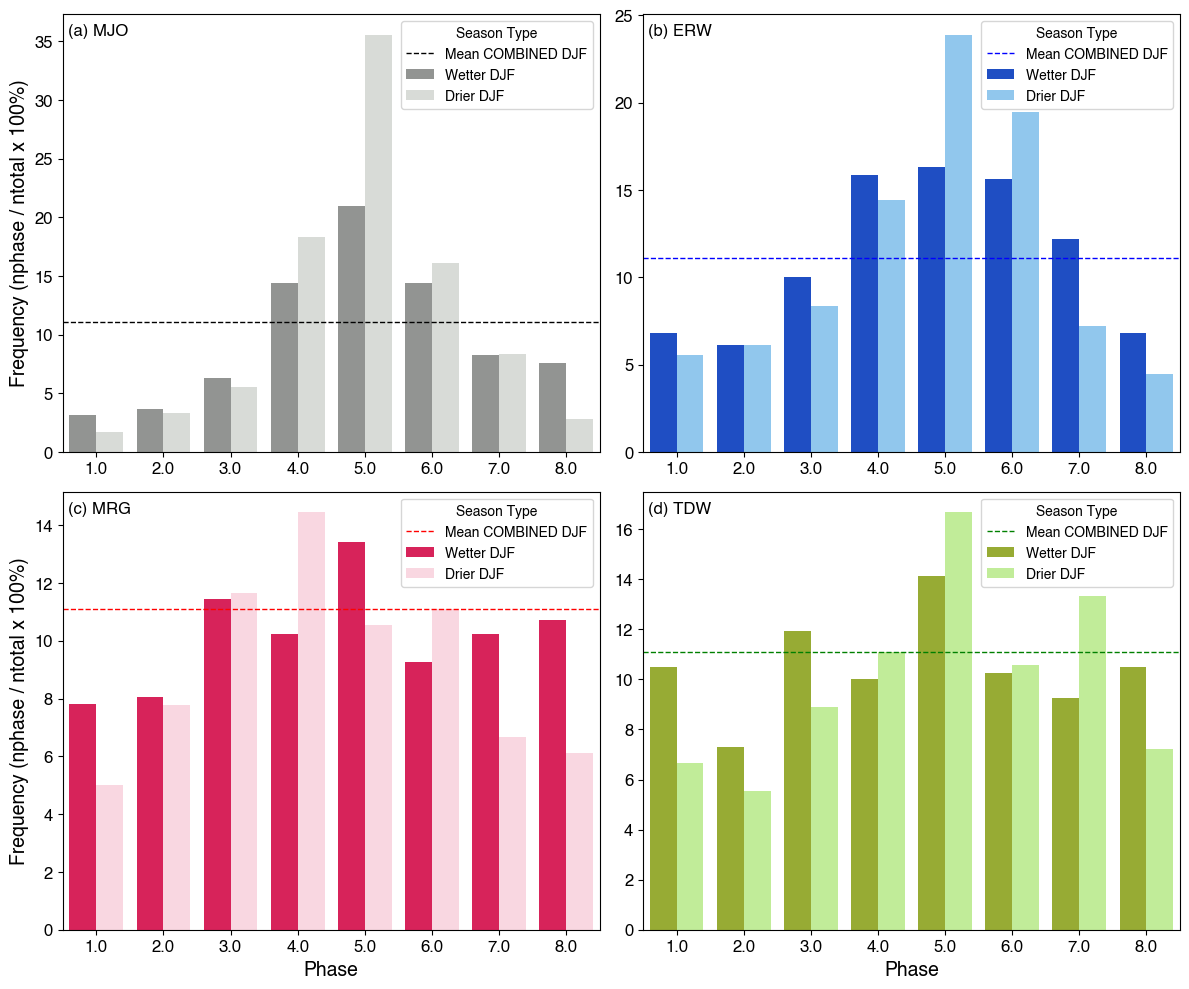

In [148]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

mean_erw = df_melted_erw['ERW'].mean()
mean_mjo = df_melted_mjo['MJO'].mean()
mean_tdw = df_melted_tdw['TDW'].mean()
mean_mrg = df_melted_mrg['MRG'].mean()

df_melted_mjo['phase'] = df_melted_mjo['phase'][df_melted_mjo['phase']>0].astype('int64')
df_melted_erw['phase'] = df_melted_erw['phase'][df_melted_mjo['phase']>0].astype('int64')
df_melted_mrg['phase'] = df_melted_mrg['phase'][df_melted_mjo['phase']>0].astype('int64')
df_melted_tdw['phase'] = df_melted_tdw['phase'][df_melted_mjo['phase']>0].astype('int64')

gray_MJO = sns.xkcd_palette(['grey','light grey',])
blue_ERW = sns.xkcd_palette(['blue','sky'])
red_MRG  = sns.xkcd_palette(['pink red','light pink'])
green_TDW  = sns.xkcd_palette(['pea','pistachio'])



# Bar plot for MJO
sns.barplot(x='phase', y='MJO', hue='Type', data=df_melted_mjo, ax=axs[0, 0], palette=gray_MJO)
# axs[0, 0].set_title('MJO')
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Frequency (nphase / ntotal x 100%)', size=14)
axs[0, 0].text(0.01, 0.95, '(a) MJO', transform=axs[0, 0].transAxes, fontsize=12, fontweight='bold')
axs[0, 0].tick_params(axis='both', labelsize=12)  # Change tick label size
axs[0, 0].axhline(mean_mjo, color='black', linestyle='--', label='Mean', linewidth=1)

# Bar plot for ERW
sns.barplot(x='phase', y='ERW',  hue='Type', data=df_melted_erw, ax=axs[0, 1], palette=blue_ERW)
# axs[0, 1].set_title('ERW')
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('')
axs[0, 1].text(0.01, 0.95, '(b) ERW', transform=axs[0, 1].transAxes, fontsize=12, fontweight='bold')
axs[0, 1].tick_params(axis='both', labelsize=12)  # Change tick label size
axs[0, 1].axhline(mean_erw, color='blue', linestyle='--', label='Mean', linewidth=1)

# Bar plot for MRG
sns.barplot(x='phase', y='MRG',  hue='Type', data=df_melted_mrg, ax=axs[1, 0], palette=red_MRG)
# axs[1, 0].set_title('MRG')
axs[1, 0].set_xlabel('Phase', size=14)
axs[1, 0].set_ylabel(('Frequency (nphase / ntotal x 100%)'), size=14)
axs[1, 0].text(0.01, 0.95, '(c) MRG', transform=axs[1, 0].transAxes, fontsize=12, fontweight='bold')
axs[1, 0].tick_params(axis='both', labelsize=12)  # Change tick label size
axs[1, 0].axhline(mean_mrg, color='red', linestyle='--', label='Mean', linewidth=1)

# Bar plot for TDW
sns.barplot(x='phase', y='TDW',  hue='Type', data=df_melted_tdw, ax=axs[1, 1], palette=green_TDW)
# axs[1, 1].set_title('TDW')
axs[1, 1].set_xlabel('Phase',size=14)
axs[1, 1].set_ylabel('')
axs[1, 1].text(0.01, 0.95, '(d) TDW', transform=axs[1, 1].transAxes, fontsize=12, fontweight='bold')
axs[1, 1].tick_params(axis='both', labelsize=12)  # Change tick label size
axs[1, 1].axhline(mean_tdw, color='green', linestyle='--', label='Mean', linewidth=1)

# Adjust layout
# axs[0, 0].legend(labels=["Wetter DJF", "Drier DJF"], title='Season Type', edgecolor='None')
# axs[0, 1].legend(labels=["Wetter DJF", "Drier DJF"], title='Season Type', edgecolor='None')
# axs[1, 0].legend(labels=["Wetter DJF", "Drier DJF"], title='Season Type', edgecolor='None')
# axs[1, 1].legend(labels=["Wetter DJF", "Drier DJF"], title='Season Type', edgecolor='None')


for ax in axs.flat:
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, ["Mean COMBINED DJF","Wetter DJF", "Drier DJF"], title='Season Type', loc='upper right', frameon=True)
# ax.axhline(mean_)
    
# plt.legend(labels=["Thur", "Fri", "Sat", "Sun"], title="Days")

plt.tight_layout()
# plt.savefig(folderout+freq+'wetter_drier_contrib_wet_days.png')
plt.show()

In [151]:

mean_erw = df_melted_erw['ERW'].mean()

In [152]:
df_dry_wetdays_contrib

,MJO,ERW,MRG,TDW,phase
phase,,,,,
0.0,8.33,10.56,26.67,20.00,0.0
1.0,1.67,5.56,5.00,6.67,1.0
2.0,3.33,6.11,7.78,5.56,2.0
3.0,5.56,8.33,11.67,8.89,3.0
4.0,18.33,14.44,14.44,11.11,4.0
5.0,35.56,23.89,10.56,16.67,5.0
6.0,16.11,19.44,11.11,10.56,6.0
7.0,8.33,7.22,6.67,13.33,7.0
8.0,2.78,4.44,6.11,7.22,8.0


In [153]:

df_melted_mjo_anom = df_melted_mjo.copy()
df_melted_erw_anom = df_melted_erw.copy()
df_melted_mrg_anom = df_melted_mrg.copy()
df_melted_tdw_anom = df_melted_tdw.copy()

df_melted_mjo_anom['MJO'] = df_melted_mjo['MJO'] 
df_melted_erw_anom['ERW'] = df_melted_erw['ERW'] 
df_melted_mrg_anom['MRG'] = df_melted_mrg['MRG'] 
df_melted_tdw_anom['TDW'] = df_melted_tdw['TDW']


In [154]:
df_melted_mjo_anom

,phase,Type,MJO
0,NaN,MJO_wetter,21.22
1,1.0,MJO_wetter,3.17
2,2.0,MJO_wetter,3.66
3,3.0,MJO_wetter,6.34
4,4.0,MJO_wetter,14.39
5,5.0,MJO_wetter,20.98
6,6.0,MJO_wetter,14.39
7,7.0,MJO_wetter,8.29
8,8.0,MJO_wetter,7.56
9,NaN,MJO_drier,8.33


In [155]:
pval_wet = pd.DataFrame(
    columns={'MJO':None,
             'ERW':None,
             'MRG':None,
             'TDW':None,
            }, index=iarr)
# pval

bootstrapped_wet = pd.DataFrame(
    columns={
             'MJO':None,
             'ERW':None,
             'MRG':None,
             'TDW':None,
            }, index=iarr)

In [156]:
groupwet

{'MJO':                    x         y       amp  phase  yyyy-mm-dd  years  precip  \
 yyyy-mm-dd                                                                   
 1980-12-01  0.949463  0.220124  0.974646    0.0  1980-12-01   1980   False   
 1980-12-02  0.976486  0.065454  0.978677    0.0  1980-12-02   1980   False   
 1980-12-03  0.973155 -0.110174  0.979372    0.0  1980-12-03   1980   False   
 1980-12-04  0.936606 -0.295380  0.982080    0.0  1980-12-04   1980   False   
 1980-12-05  0.866237 -0.477013  0.988892    0.0  1980-12-05   1980   False   
 ...              ...       ...       ...    ...         ...    ...     ...   
 2017-02-24  2.027686 -0.847624  2.197721    2.0  2017-02-24   2017   False   
 2017-02-25  1.869125 -0.860294  2.057604    2.0  2017-02-25   2017   False   
 2017-02-26  1.716288 -0.793767  1.890955    2.0  2017-02-26   2017   False   
 2017-02-27  1.581807 -0.669500  1.717657    2.0  2017-02-27   2017   False   
 2017-02-28  1.473951 -0.512999  1.560673    

In [157]:
df_melted_mjo_anom_sig = df_melted_mjo_anom.copy()
df_melted_erw_anom_sig = df_melted_erw_anom.copy()
df_melted_mrg_anom_sig = df_melted_mrg_anom.copy()
df_melted_tdw_anom_sig = df_melted_tdw_anom.copy()

# df_melted_mjo_anom_sig['significant'] = None
# df_melted_erw_anom_sig['significant'] = None
# df_melted_mrg_anom_sig['significant'] = None
# df_melted_tdw_anom_sig['significant'] = None

In [158]:
df_melted_mjo_anom_sig

,phase,Type,MJO
0,NaN,MJO_wetter,21.22
1,1.0,MJO_wetter,3.17
2,2.0,MJO_wetter,3.66
3,3.0,MJO_wetter,6.34
4,4.0,MJO_wetter,14.39
5,5.0,MJO_wetter,20.98
6,6.0,MJO_wetter,14.39
7,7.0,MJO_wetter,8.29
8,8.0,MJO_wetter,7.56
9,NaN,MJO_drier,8.33


In [159]:
df_mjo_sig = df_melted_mjo_anom
df_erw_sig = df_melted_erw_anom_sig
df_mrg_sig = df_melted_mrg_anom_sig
df_tdw_sig = df_melted_tdw_anom_sig

In [160]:
df_melted_erw_anom

,phase,Type,ERW
0,NaN,ERW_wetter,10.24
1,1.0,ERW_wetter,6.83
2,2.0,ERW_wetter,6.10
3,3.0,ERW_wetter,10.00
4,4.0,ERW_wetter,15.85
5,5.0,ERW_wetter,16.34
6,6.0,ERW_wetter,15.61
7,7.0,ERW_wetter,12.20
8,8.0,ERW_wetter,6.83
9,NaN,ERW_drier,10.56


In [161]:
df_mjo_sig


,phase,Type,MJO
0,NaN,MJO_wetter,21.22
1,1.0,MJO_wetter,3.17
2,2.0,MJO_wetter,3.66
3,3.0,MJO_wetter,6.34
4,4.0,MJO_wetter,14.39
5,5.0,MJO_wetter,20.98
6,6.0,MJO_wetter,14.39
7,7.0,MJO_wetter,8.29
8,8.0,MJO_wetter,7.56
9,NaN,MJO_drier,8.33


In [162]:
mean_weak_mjo_wet = df_melted_mjo_anom.iloc[0]['MJO']
mean_weak_erw_wet = df_melted_erw_anom.iloc[0]['ERW']
mean_weak_mrg_wet = df_melted_mrg_anom.iloc[0]['MRG']
mean_weak_tdw_wet = df_melted_tdw_anom.iloc[0]['TDW']


In [163]:
mean_weak_mjo_dry = df_melted_mjo_anom.iloc[9]['MJO']
mean_weak_erw_dry = df_melted_erw_anom.iloc[9]['ERW']
mean_weak_mrg_dry = df_melted_mrg_anom.iloc[9]['MRG']
mean_weak_tdw_dry = df_melted_tdw_anom.iloc[9]['TDW']


In [164]:
df_mjo_sig['MJO'][df_mjo_sig['Type']=='MJO_drier']


9      8.33
10     1.67
11     3.33
12     5.56
13    18.33
14    35.56
15    16.11
16     8.33
17     2.78
Name: MJO, dtype: float64

In [165]:
print(line_erw['ERW'][df_erw_sig['Type']=='ERW_wetter'].mean())
print(line_erw['ERW'][df_erw_sig['Type']=='ERW_drier'].mean())

NameError: name 'line_erw' is not defined

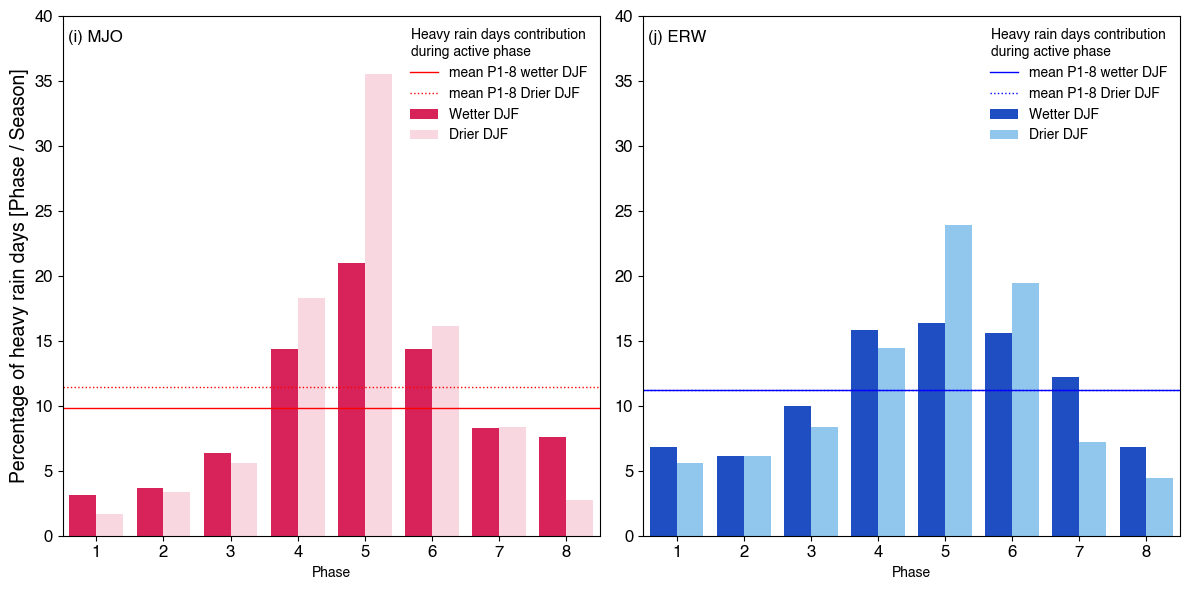

In [166]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))


gray = sns.xkcd_palette(['grey','light grey',])
blue = sns.xkcd_palette(['blue','sky'])
red  = sns.xkcd_palette(['pink red','light pink'])
green  = sns.xkcd_palette(['pea','pistachio'])
orange = sns.xkcd_palette(['orange','golden yellow'])

ylabel = 'Percentage of heavy rain days [Phase / Season]'

# Bar plot for MJO
line_mjo = df_mjo_sig.dropna()
sns.barplot(x='phase', y='MJO', hue='Type', data=line_mjo, ax=axs[0], palette=red)
# sns.lineplot(x='phase', y='MJO', hue='Type', data=df_melted_total_mjo, ax=axs[0], palette=red)


# axs[0, 0].set_title('MJO')
axs[0].set_xlabel('Phase')
# axs[0].set_xticks(np.arange(1,9,dtype='int16'))
axs[0].set_ylabel(ylabel, size=14)
axs[0].text(0.01, 0.95, '(i) MJO', transform=axs[0].transAxes, fontsize=12, fontweight='bold')
axs[0].tick_params(axis='both', labelsize=12)  # Change tick label size

axs[0].axhline(line_mjo['MJO'][line_mjo['Type']=='MJO_wetter'].mean(), color='red', linestyle='solid',  linewidth=1,label=True)
axs[0].axhline(line_mjo['MJO'][line_mjo['Type']=='MJO_drier'].mean(), color='red', linestyle=':', linewidth=1,label=True)
# add_significance_markers(axs[0, 0], df_mjo_sig, 'MJO',color='black')

# Bar plot for ERW
line_erw = df_erw_sig.dropna()
sns.barplot(x='phase', y='ERW',  hue='Type', data=line_erw, ax=axs[1], palette=blue)
# axs[0, 1].set_title('ERW')
axs[1].set_xlabel('Phase')
axs[1].set_ylabel('')
axs[1].text(0.01, 0.95, '(j) ERW', transform=axs[1].transAxes, fontsize=12, fontweight='bold')
axs[1].tick_params(axis='both', labelsize=12)  # Change tick label size

axs[1].axhline(line_erw['ERW'][line_erw['Type']=='ERW_wetter'].mean(), color='blue', linestyle='solid', linewidth=1,label=True)
axs[1].axhline(line_erw['ERW'][line_erw['Type']=='ERW_drier'].mean(), color='blue', linestyle=':', linewidth=1,label=True)
# add_significance_markers(axs[0, 1], df_erw_sig,'ERW',color='blue')


for ax in axs.flat:
    handles, _ = ax.get_legend_handles_labels()
    
    ax.legend(handles, ["mean P1-8 wetter DJF", "mean P1-8 Drier DJF",'Wetter DJF','Drier DJF',], title='Heavy rain days contribution\nduring active phase', loc='upper right', frameon=False)
    ax.set_ylim(0,40)
    ax.set_xticklabels(np.arange(1,9,dtype='int16'))
    # ax.axhline(mean_)
    
# plt.legend(labels=["Thur", "Fri", "Sat", "Sun"], title="Days")

plt.tight_layout()
plt.savefig(folderout+freq+'wetter_drier_contribanom_wet_days.pdf')
plt.show()

In [167]:
print(line_mjo)

    phase        Type    MJO
1     1.0  MJO_wetter   3.17
2     2.0  MJO_wetter   3.66
3     3.0  MJO_wetter   6.34
4     4.0  MJO_wetter  14.39
5     5.0  MJO_wetter  20.98
6     6.0  MJO_wetter  14.39
7     7.0  MJO_wetter   8.29
8     8.0  MJO_wetter   7.56
10    1.0   MJO_drier   1.67
11    2.0   MJO_drier   3.33
12    3.0   MJO_drier   5.56
13    4.0   MJO_drier  18.33
14    5.0   MJO_drier  35.56
15    6.0   MJO_drier  16.11
16    7.0   MJO_drier   8.33
17    8.0   MJO_drier   2.78


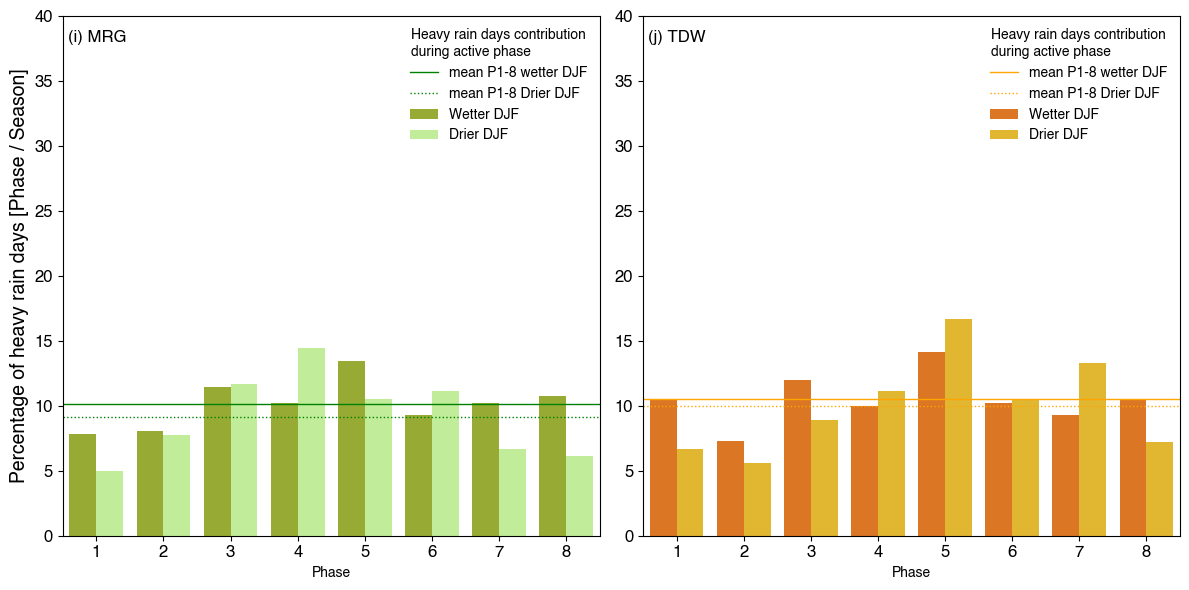

In [168]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))


def add_significance_markers(ax, data, y_col,color):
    for index, row in data.iterrows():
        if row['significance'] == 1:
#             print(row['phase'])
            bar_position = row['phase']-1 + (bar_width / 2)-0.3 if row['Type'] == y_col+'_wetter' else row['phase'] - (bar_width / 2)-0.75
            ypos = row[y_col] if row[y_col] < 0 else row[y_col]
            ax.text(bar_position, ypos, '*', ha='center', va='bottom', color=color, fontsize=14)
            
gray = sns.xkcd_palette(['grey','light grey',])
blue = sns.xkcd_palette(['blue','sky'])
red  = sns.xkcd_palette(['pink red','light pink'])
green  = sns.xkcd_palette(['pea','pistachio'])
orange = sns.xkcd_palette(['orange','golden yellow'])

ylabel = 'Percentage of heavy rain days [Phase / Season]'


# Bar plot for MJO
sns.barplot(x='phase', y='MRG', hue='Type', data=df_mrg_sig, ax=axs[0], palette=green)
# sns.lineplot(x='phase', y='MJO', hue='Type', data=df_melted_total_mjo, ax=axs[0], palette=red)
# axs[0, 0].set_title('MJO')
axs[0].set_xlabel('Phase')
axs[0].set_ylabel(ylabel, size=14)
axs[0].text(0.01, 0.95, '(i) MRG', transform=axs[0].transAxes, fontsize=12, fontweight='bold')
axs[0].tick_params(axis='both', labelsize=12)  # Change tick label size

line_mrg = df_mrg_sig.dropna()
axs[0].axhline(line_mrg['MRG'][df_mrg_sig['Type']=='MRG_wetter'].mean(), color='green', linestyle='solid',  linewidth=1,label=True)
axs[0].axhline(line_mrg['MRG'][df_mrg_sig['Type']=='MRG_drier'].mean(), color='green', linestyle=':', linewidth=1,label=True)
# add_significance_markers(axs[0, 0], df_mjo_sig, 'MJO',color='black')

# Bar plot for ERW
sns.barplot(x='phase', y='TDW',  hue='Type', data=df_tdw_sig, ax=axs[1], palette=orange)
# axs[0, 1].set_title('ERW')
axs[1].set_xlabel('Phase')
axs[1].set_ylabel('')
axs[1].text(0.01, 0.95, '(j) TDW', transform=axs[1].transAxes, fontsize=12, fontweight='bold')
axs[1].tick_params(axis='both', labelsize=12)  # Change tick label size

line_tdw = df_tdw_sig.dropna()
axs[1].axhline(line_tdw['TDW'][df_tdw_sig['Type']=='TDW_wetter'].mean(), color='orange', linestyle='solid', linewidth=1,label=True)
axs[1].axhline(line_tdw['TDW'][df_tdw_sig['Type']=='TDW_drier'].mean(), color='orange', linestyle=':', linewidth=1,label=True)
# add_significance_markers(axs[0, 1], df_erw_sig,'ERW',color='blue')


for ax in axs.flat:
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, ["mean P1-8 wetter DJF", "mean P1-8 Drier DJF",'Wetter DJF','Drier DJF',], title='Heavy rain days contribution\nduring active phase', loc='upper right', frameon=False)
    ax.set_ylim(0,40)
    ax.set_xticklabels(np.arange(1,9,dtype='int16'))
    # ax.axhline(mean_)
    
    
# plt.legend(labels=["Thur", "Fri", "Sat", "Sun"], title="Days")

plt.tight_layout()
plt.savefig(folderout+freq+'wetter_drier_contribanom_SUPP_wet_days.pdf')
plt.show()

In [169]:
# df_melted_total_mjo = df_melted_total_mjo.drop([0, 9])
# df_melted_total_erw = df_melted_total_erw.drop([0, 9])
# df_melted_total_klv = df_melted_total_klv.drop([0, 9])
df_melted_total_mrg = df_melted_total_mrg.drop([0, 9])
df_melted_total_tdw = df_melted_total_tdw.drop([0, 9])

In [170]:
df_melted_total_erw

,phase,Type,ERW
0,0.0,ERW_wetter,42
1,1.0,ERW_wetter,28
2,2.0,ERW_wetter,25
3,3.0,ERW_wetter,41
4,4.0,ERW_wetter,65
5,5.0,ERW_wetter,67
6,6.0,ERW_wetter,64
7,7.0,ERW_wetter,50
8,8.0,ERW_wetter,28
9,0.0,ERW_drier,19
